<a href="https://colab.research.google.com/github/hbbalamsyah/credit-risk-using-XGBoost-LGBM-LogisticRegression/blob/main/Credit_Scoring_Using_XGBoost_LGBM_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Credit Risk Prediction

----------

# Data Collection

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from matplotlib import rcParams

matplotlib.rcParams['font.family'] = 'Tw Cen MT'
rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'
rcParams['axes.facecolor'] = '1'

In [ ]:
df_raw = pd.read_csv("/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv")
df_raw

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [ ]:
df_raw.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti    delinq_2yrs  inq_last_6mths  \
count  4.662810e+05  466285.000000  466256.000000   466256.000000   
mean   7.327738e+04      17.218758       0.284678        0.804745   
std    5.496357e+04       7.851121       0.797365        1.091598   
min    1.896000e+03       0.000000       0.000000        0.000000   
25%    4.500000e+04      11.360000       0.000000        0.000000   
50%    6.300000e+04      16.870000       0.000000        0.000000   
75%    8.896000e+04      22.780000       0.000000        1.000000   
max    7.500000e+06      39.990000      29.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record       open_acc  \
count           215934.000000            62638.000000  466256.000000   
mean                34.104430               74.306012      11.187069   
std                 21.778487               30.357653       4.987526   
min                  0.000000                0.000000       0.000000   
25%                 16.000000               53.000000       8.000000   
50%                 31.000000               76.000000      10.000000   
75%                 49.000000              102.000000      14.000000   
max                188.000000              129.000000      84.000000   

             pub_rec     revol_bal     revol_util      total_acc  \
count  466256.000000  4.662850e+05  465945.000000  466256.000000   
mean        0.160564  1.623020e+04      56.176947      25.064430   
std         0.510863  2.067625e+04      23.732628      11.600141   
min         0.000000  0.000000e+00       0.000000       1.000000   
25%         0.000000  6.413000e+03      39.200000      17.000000   
50%         0.000000  1.176400e+04      57.600000      23.000000   
75%         0.000000  2.033300e+04      74.700000      32.000000   
max        63.000000  2.568995e+06     892.300000     156.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  466285.000000  466285.000000  466285.000000    466285.000000   
mean     4410.062342    4408.452258   11540.686220     11469.892747   
std      6355.078769    6353.198001    8265.627112      8254.157579   
min         0.000000       0.000000       0.000000         0.000000   
25%         0.000000       0.000000    5552.125349      5499.250000   
50%       441.470000     441.380000    9419.250943      9355.430000   
75%      7341.650000    7338.390000   15308.158460     15231.310000   
max     32160.380000   32160.380000   57777.579870     57777.580000   

       total_rec_prncp  total_rec_int  total_rec_late_fee     recoveries  \
count    466285.000000  466285.000000       466285.000000  466285.000000   
mean       8866.014657    2588.677225            0.650129      85.344211   
std        703

In [ ]:
# Drop Unnamed: 0 column

df_raw.drop(['Unnamed: 0'],axis=1,inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Drop Features 1

In [ ]:
df_raw.sample(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
43667   9394732   11226865      18000        18000          17950.0   
130891  5628018    7010362      23675        23675          23650.0   
182879  2228884    2641443      12000        12000          12000.0   

              term  int_rate  installment grade sub_grade  \
43667    60 months     14.98       428.03     C        C3   
130891   60 months      8.90       490.31     A        A5   
182879   36 months     11.14       393.67     B        B2   

                         emp_title emp_length home_ownership  annual_inc  \
43667                        labor  10+ years       MORTGAGE     70000.0   
130891  FSA Marketing Systems, Inc    6 years       MORTGAGE     53560.0   
182879         Forest Laboratories  10+ years       MORTGAGE    175000.0   

       verification_status issue_d loan_status pymnt_plan  \
43667             Verified  Dec-13     Current          n   
130891            Verified  Jun-13  Fully Paid          n   
182879            Verified  Dec-12  Fully Paid          n   

                                                      url  \
43667   https://www.lendingclub.com/browse/loanDetail....   
130891  https://www.lendingclub.com/browse/loanDetail....   
182879  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
43667                                                 NaN         credit_card   
130891    Borrower added on 05/30/13 > I am seeking a ...  debt_consolidation   
182879                                                NaN    home_improvement   

                          title zip_code addr_state    dti  delinq_2yrs  \
43667   Credit card refinancing    930xx         CA  16.18          1.0   
130891       Debt Consolidatoin    480xx         MI  25.42          0.0   
182879                  Hot Tub    294xx         SC  20.05          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
43667            Jun-01             0.0                     9.0   
130891           Aug-90             0.0                     NaN   
182879           Aug-87             0.0                    12.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
43667                      NaN       7.0      0.0      13257        65.0   
130891                     NaN      10.0      0.0      33062        33.9   
182879                     NaN      11.0      0.0      24726        57.5   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
43667        28.0                   f   12351.83       12317.52  10270.91000   
130891       29.0                   f       0.00           0.00  27950.86998   
182879       27.0                   f       0.00           0.00  13990.71667   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
43667          10242.38          5648.17        4622.74                 0.0   
130891         27921.35         23675.00        4275.87                 0.0   
182879         13990.72         12000.00        1990.72                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
43667          0.0                      0.0       Jan-16           428.03   
130891         0.0                      0.0       Jan-16         13241.57   
182879         0.0                      0.0       Feb-15          4149.11   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
43667        Feb-16             Jan-16                         0.0   
130891          NaN             Jan-16                         0.0   
182879          NaN             Feb-15                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
43667                           NaN            1       INDIVIDUAL   
130891                          NaN            1       INDIVIDUAL   
182879                         30.0            1     

In [ ]:
df_raw.isna().sum().sort_values(ascending=False)

inq_last_12m                   466285
verification_status_joint      466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
dti_joint                      466285
total_bal_il                   466285
annual_inc_joint               466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m                    466285
max_bal_bc                     466285
all_util                       466285
inq_fi                         466285
total_cu_tl                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
emp_title                       27588
emp_length  

In [ ]:
columns_to_drop = [
    # unique values
    'id','member_id',

    # all null values
    'inq_last_12m', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
    'mths_since_rcnt_il', 'dti_joint', 'total_bal_il', 'annual_inc_joint', 'il_util', 'open_rv_12m', 'open_rv_24m',
    'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',

    # free text
    'url', 'desc',

    # censored personal value (e.g. 330xxx)
    'zip_code',

    # detailed variables (already represented by the `grade` column)
    'sub_grade',

    # constant values
    'policy_code']

In [ ]:
df = df_raw.drop(columns_to_drop, axis=1)
df.shape

(466285, 50)

Check Duplicated Data

In [ ]:
print('Number of rows and columns:', df_raw.shape)
print('Number of unique values in the `id` column:', df_raw.id.nunique())
print('Number of unique values in the `member_id` column:', df_raw.member_id.nunique())

Number of rows and columns: (466285, 74)
Number of unique values in the `id` column: 466285
Number of unique values in the `member_id` column: 466285


- No duplicate identities means 1 row represents 1 individual

## Define Target

- Credit risk is the risk associated with the possibility of default or unable to pay debts by borrowers to creditors.
- To reduce credit risk, creditors carry out a credit analysis of prospective borrowers, checking credit history, credit scores, and the borrower's financial ability to repay debts.
- Thus, the `loan_status` feature in this dataset can be used as the right target feature because it reflects the borrower's ability to repay the loan or credit provided.

In [ ]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Current = Payment is current and is still due for payment
- Fully Paid = Payment has been paid off
- Charged Off = Payment is jammed and has been written off
- Late = Late payments within a certain period of days
- In Grace Period = Payments within the grace period
- Default = Payment stuck

From this definition, it can be defined as individuals who have good loans or bad loans.
- "Good loan" refers to a loan that is repaid on time and in accordance with the agreed terms, while "bad loan" refers to a loan that cannot be repaid or is repaid late, even reaching a default status.

In [ ]:
good_loan_status = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period', 'Late (16-30 days)']

df['proba_of_default'] = np.where(df['loan_status'].isin(good_loan_status), 0, 1)

In [ ]:
df['proba_of_default'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: proba_of_default, dtype: float64

The dataset has target features including:

- 1 means the borrower is likely to default on payments
- 0 means the borrower is likely to repay the debt smoothly

# Preprocessing

In [ ]:
df.sample(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
265707      20000        20000          20000.0   60 months     15.61   
141197       4000         4000           4000.0   36 months     18.75   
186136      18000        18000          18000.0   60 months     13.11   

        installment grade                  emp_title emp_length  \
265707       482.23     D                    Manager  10+ years   
141197       146.12     D  Golden State Orthopaedics   < 1 year   
186136       410.57     B          Pratt and Whitney    6 years   

       home_ownership  annual_inc verification_status issue_d loan_status  \
265707           RENT    115000.0     Source Verified  Oct-14     Current   
141197           RENT     50000.0        Not Verified  May-13  Fully Paid   
186136           RENT     85000.0     Source Verified  Nov-12  Fully Paid   

       pymnt_plan             purpose               title addr_state    dti  \
265707          n  debt_consolidation  Debt consolidation         CA  14.77   
141197          n               house   Home Down Payment         CA  23.45   
186136          n  debt_consolidation         Better Rate         CT  17.00   

        delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
265707          0.0           Sep-11             0.0                     NaN   
141197          0.0           Jul-06             0.0                    33.0   
186136          0.0           Dec-03             2.0                    30.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
265707                     NaN      13.0      0.0      21473        76.1   
141197                     NaN       6.0      0.0       5603        90.4   
186136                     NaN       8.0      0.0       2234        18.6   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
265707       14.0                   w   16614.06       16614.06   6716.530000   
141197        9.0                   f       0.00           0.00   4563.651467   
186136       24.0                   w       0.00           0.00  21006.768910   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
265707          6716.53          3385.94        3330.59                 0.0   
141197          4563.65          4000.00         563.65                 0.0   
186136         21006.77         18000.00        3006.77                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
265707         0.0                      0.0       Jan-16           482.23   
141197         0.0                      0.0       Mar-14          3248.66   
186136         0.0                      0.0       Apr-14         14438.55   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
265707       Jan-16             Jan-16                         0.0   
141197          NaN             Jan-16                         0.0   
186136          NaN             Jun-15                         0.0   

        mths_since_last_major_derog application_type  acc_now_delinq  \
265707                          NaN       INDIVIDUAL             0.0   
141197                         38.0       INDIVIDUAL             0.0   
186136                          NaN       INDIVIDUAL             0.0   

        tot_coll_amt  tot_cur_bal  total_rev_hi_lim  proba_of_default  
265707           0.0      32742.0           28200.0                 0  
141197           0.0      39932.0            6200.0                 0  
186136           0.0      42900.0           12000.0                 0

## Feature Engineering

**Data Transformation**

The following variables are not possessing appropriate data types and should be modified

In [ ]:
continuous_cols = ['term', 'emp_length','issue_d', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df[continuous_cols]

term emp_length issue_d earliest_cr_line last_pymnt_d  \
0        36 months  10+ years  Dec-11           Jan-85       Jan-15   
1        60 months   < 1 year  Dec-11           Apr-99       Apr-13   
2        36 months  10+ years  Dec-11           Nov-01       Jun-14   
3        36 months  10+ years  Dec-11           Feb-96       Jan-15   
4        60 months     1 year  Dec-11           Jan-96       Jan-16   
...            ...        ...     ...              ...          ...   
466280   60 months    4 years  Jan-14           Apr-03       Jan-16   
466281   60 months  10+ years  Jan-14           Jun-97       Dec-14   
466282   60 months    7 years  Jan-14           Dec-01       Jan-16   
466283   36 months    3 years  Jan-14           Feb-03       Dec-14   
466284   36 months  10+ years  Jan-14           Feb-00       Jan-16   

       next_pymnt_d last_credit_pull_d  
0               NaN             Jan-16  
1               NaN             Sep-13  
2               NaN             Jan-16  
3               NaN             Jan-15  
4            Feb-16             Jan-16  
...             ...                ...  
466280       Feb-16             Jan-16  
466281          NaN             Jan-16  
466282       Feb-16             Dec-15  
466283          NaN             Apr-15  
466284       Feb-16             Jan-16  

[466285 rows x 7 columns]

### *Snapshot Date*
- before modifying a feature that is a date, it is very important to determine the snapshot date or reference date.
- the snapshot date is a specific date at the time of data capture or "snapshot" data capture. This is the reference date used in data analysis, where all data captured on or before this date is considered current or most recent data.
- this dataset is data from 2007-2014. If you take this year as a snapshot day, the data will become less relevant. In addition, there is data in the `last_pymnt_d` column which was last paid in early January 2016.
- for all data to get fair treatment, the snapshot date is set at the end of 2016 or 01-12-2016.

In [ ]:
snapshot_date = pd.to_datetime('2016-12-01')
snapshot_date

Timestamp('2016-12-01 00:00:00')

### Feature `term`
- The term credit is generally used in the context of long-term credit, such as a mortgage or car loan, where the loan amount is relatively large and the repayment term spans several years.
- this feature represents the number of months that the debtor / borrower must fulfill in making credit payments.
- the value of this feature will be converted to an integer, for example, 36 months -> 36.

In [ ]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df['term_int'] = df['term'].str.replace(' months', '')
df['term_int'] = df['term_int'].astype(int)

In [ ]:
df[['term','term_int']].sample(3)

term  term_int
11890    36 months        36
413461   36 months        36
265800   36 months        36

### Feature `emp_length`
- Employment length is a feature that indicates the length of time or tenure of the borrower in numerical form (in this dataset it is in years).
- generally, the longer the borrower's work experience, the more stable the job position and the lower the credit risk.
- the value of this feature will be converted to an integer, for example, 10+ years -> 10.

In [ ]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','')

df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0))

df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')

df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')

In [ ]:
df['emp_length_int'] = df['emp_length_int'].astype(float)

In [ ]:
df[['emp_length','emp_length_int']].sample(3)

emp_length  emp_length_int
171356    9 years             9.0
269790  10+ years            10.0
218404  10+ years            10.0

### Feature `issue_d`
- this feature provides information about the timing of loans and can help identify trends in lending over time.
- a starting point for calculating credit terms and for grouping credits into certain categories.
- therefore, this feature will be modified to the time after borrowing (in months) of the shapshot date.

In [ ]:
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [ ]:
df['date_issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['date_issue_d'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2010-12-01T00:00:00.000000000', '2010-11-01T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-09-01

In [ ]:
df['months_since_issue_d'] = round(pd.to_numeric((snapshot_date - df['date_issue_d']) / np.timedelta64(1, 'M'))).astype('int')

In [ ]:
issue_d_modif = df[['issue_d','date_issue_d','months_since_issue_d']]

print('Snapshot_date:',snapshot_date)
display(issue_d_modif.sample(3))

Snapshot_date: 2016-12-01 00:00:00


issue_d date_issue_d  months_since_issue_d
25040   Oct-10   2010-10-01                    74
461866  Jan-14   2014-01-01                    35
121076  Jul-13   2013-07-01                    41

In [ ]:
df['months_since_issue_d'].describe()

count    466285.000000
mean         39.255187
std          14.340154
min          24.000000
25%          29.000000
50%          35.000000
75%          45.000000
max         114.000000
Name: months_since_issue_d, dtype: float64

- Dari output di atas terlihat data kolom `months_since_issue_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasi pada fitur ini sudah aman untuk keseluruhan dataset.

In [ ]:
df.drop(['issue_d'], axis=1, inplace=True)

### Feature `earliest_cr_line`
- this feature can be the duration of how long the borrower has been involved in managing finances and credit obligations.
- In general, this feature is used to calculate the length of the borrower's credit history when applying for a loan.
- therefore, this feature will be changed to the period the borrower has engaged with credit (in months) against the snapshot date.

In [ ]:
df['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

- Berdasarkan output di atas, dapat diasumsikan bahwa dua angka terakhir merupakan tahun. Dimana "-98" berarti 1998 dan "-01" berarti 2001.

In [ ]:
df['date_earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

df['months_since_earliest_cr_line'] = round(pd.to_numeric((snapshot_date - df['date_earliest_cr_line']) / np.timedelta64(1, 'M')))

In [ ]:
earliest_cr_line_modif = df[['earliest_cr_line','date_earliest_cr_line','months_since_earliest_cr_line']]

print('Snapshot_date:',snapshot_date)
display(earliest_cr_line_modif.head(3))

Snapshot_date: 2016-12-01 00:00:00


earliest_cr_line date_earliest_cr_line  months_since_earliest_cr_line
0           Jan-85            1985-01-01                          383.0
1           Apr-99            1999-04-01                          212.0
2           Nov-01            2001-11-01                          181.0

In [ ]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        227.482430
std          93.974829
min        -624.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

- Terdapat value negatif pada data yang mana tidak mungkin terjadi. Sehingga, perlu dicek dan dimodifikasi datanya.

In [ ]:
display(earliest_cr_line_modif[earliest_cr_line_modif['months_since_earliest_cr_line']<0].head(3),
        earliest_cr_line_modif[earliest_cr_line_modif['months_since_earliest_cr_line']<0].count())

earliest_cr_line date_earliest_cr_line  months_since_earliest_cr_line
1580           Sep-62            2062-09-01                         -549.0
1770           Sep-68            2068-09-01                         -621.0
2799           Sep-64            2064-09-01                         -573.0

earliest_cr_line                 1169
date_earliest_cr_line            1169
months_since_earliest_cr_line    1169
dtype: int64

- Data dengan nilai negatif muncul karena kesalahan Python dalam membaca tahun 62 yang mana seharusnya adalah 1962, tetapi malah diubah menjadi 2062.
- Dikarenakan data yang error hanya sekitar <b>0.2%</b> total keseluruhan data, maka diputuskan untuk mengahpus data error tersebut.
- Disamping itu, customer dengan sejarah credit dimulai pada pertengahan 1900-an kemungkinan besar sudah tidak aktif dan banyak market shifting pada transisi abad 20-21.
- Sehingga hal ini dapat mendorong argumen untuk menghapus data-data error tersebut.

In [ ]:
print('Before drop rows:', df.shape)

df.drop(df[df['months_since_earliest_cr_line']<0].index, inplace=True)

print('After drop rows:', df.shape)

# Alternate Code
# df = df.query('months_since_earliest_cr_line >= 0')

Before drop rows: (466285, 56)
After drop rows: (465116, 56)


In [ ]:
df['months_since_earliest_cr_line'].describe()

count    465087.000000
mean        229.519182
std          84.822883
min          61.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

- Dari output di atas, kolom `months_since_earliest_cr_line` sudah tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [ ]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

### Feature `last_pymnt_d`
- this feature is the last month and year the payment was made by the borrower.
- This feature can also be used as a reference whether borrowers tend to pay credit smoothly or not.
- Therefore, this feature will be modified to the last time the borrower paid credit (in months) against the shapshot date.

In [ ]:
df['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'Jan-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12',
       'Feb-13', 'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13',
       'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15', 'Dec-15', 'Jan-12',
       'Oct-15', 'Nov-14', 'Mar-12', 'May-12', 'Jun-15', 'May-15',
       'Jul-15', 'Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10',
       'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09',
       'Jul-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09',
       'Jan-09', 'Dec-08', 'Oct-08', 'Aug-08', 'Jul-08', 

In [ ]:
df['date_last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['date_last_pymnt_d'].unique()

array(['2015-01-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000',                           'NaT',
       '2012-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-04-01

In [ ]:
df['months_since_last_pymnt_d'] = round(pd.to_numeric((snapshot_date - df['date_last_pymnt_d']) / np.timedelta64(1, 'M')))

In [ ]:
last_pymnt_d_modif = df[['last_pymnt_d','date_last_pymnt_d','months_since_last_pymnt_d']]

print('Snapshot_date:',snapshot_date)
display(last_pymnt_d_modif.head(3))

Snapshot_date: 2016-12-01 00:00:00


last_pymnt_d date_last_pymnt_d  months_since_last_pymnt_d
0       Jan-15        2015-01-01                       23.0
1       Apr-13        2013-04-01                       44.0
2       Jun-14        2014-06-01                       30.0

In [ ]:
df['months_since_last_pymnt_d'].describe()

count    464741.000000
mean         19.298151
std          12.812808
min          11.000000
25%          11.000000
50%          12.000000
75%          23.000000
max         108.000000
Name: months_since_last_pymnt_d, dtype: float64

- Dari output di atas, kolom `months_since_last_pymnt_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [ ]:
df.drop(['last_pymnt_d'], axis=1, inplace=True)

### Feature `next_pymnt_d`
- feature which is the next scheduled payment due date for the borrower.
- although this feature does not provide information about whether the payment will be made or not, this feature is still a good predictor considering the due date with the distance between the last payment date can be used as a reference whether the payment has the potential to fail or not.
- this feature will be modified to be the maturity duration (in months) against the snapshot date.

In [ ]:
df['next_pymnt_d'].unique()

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [ ]:
df['date_next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')
df['date_next_pymnt_d'].unique()

array([                          'NaT', '2016-02-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2011-08-01

In [ ]:
df['months_since_next_pymnt_d'] = round(pd.to_numeric((snapshot_date - df['date_next_pymnt_d']) / np.timedelta64(1, 'M')))

In [ ]:
next_pymnt_d_modif = df[['next_pymnt_d','date_next_pymnt_d','months_since_next_pymnt_d']]

print('Snapshot_date:',snapshot_date)
display(next_pymnt_d_modif.tail(3))

Snapshot_date: 2016-12-01 00:00:00


next_pymnt_d date_next_pymnt_d  months_since_next_pymnt_d
466282       Feb-16        2016-02-01                       10.0
466283          NaN               NaT                        NaN
466284       Feb-16        2016-02-01                       10.0

In [ ]:
df['months_since_next_pymnt_d'].describe()

count    238390.000000
mean         10.738521
std           6.083252
min           9.000000
25%          10.000000
50%          10.000000
75%          10.000000
max         108.000000
Name: months_since_next_pymnt_d, dtype: float64

- Dari output di atas, kolom `months_since_next_pymnt_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [ ]:
df.drop(['next_pymnt_d'], axis=1, inplace=True)

### Feature `last_credit_pull_d`
- this feature is the last date on which the credit information was last updated by the credit processing agency.
- this information is typically used to evaluate a person's creditworthiness when they apply for a loan or submit other credit applications.
- This feature will be modified to be the duration of the credits last renewed date (in months) against the snapshot date.

In [ ]:
df['last_credit_pull_d'].unique()

array(['Jan-16', 'Sep-13', 'Jan-15', 'Sep-15', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Jul-12', 'Sep-12', 'May-13', 'Oct-15',
       'Jun-12', 'Mar-15', 'Dec-12', 'Jul-14', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12', 'Apr-12', 'Aug-15',
       'Jun-14', 'Jan-12', 'Aug-14', 'Jun-13', 'Dec-13', 'May-12',
       'Jan-14', 'Jul-13', 'Apr-13', 'May-15', 'Feb-15', 'Mar-12',
       'Nov-11', 'Dec-11', 'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10',
       'Jul-10', 'Jun-10', 'May-10', 'Apr-10', 'Feb-10', 'Mar-10',
       'Aug-07', 'Jan-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09',
       'Jul-09', 'Aug-09', 'Jun-09', 'May-09', 'Apr-09', 'Mar-09',
       'Feb-09', 'Jan-09', 'Dec-08', 'Jun-08', 'Sep-08', 

In [ ]:
df['date_last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['date_last_credit_pull_d'].unique()

array(['2016-01-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-10-01

In [ ]:
df['months_since_last_credit_pull_d'] = round(pd.to_numeric((snapshot_date - df['date_last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [ ]:
last_credit_pull_d_modif = df[['last_credit_pull_d','date_last_credit_pull_d','months_since_last_credit_pull_d']]

print('Snapshot_date:',snapshot_date)
display(last_credit_pull_d_modif.tail(3))

Snapshot_date: 2016-12-01 00:00:00


last_credit_pull_d date_last_credit_pull_d  \
466282             Dec-15              2015-12-01   
466283             Apr-15              2015-04-01   
466284             Jan-16              2016-01-01   

        months_since_last_credit_pull_d  
466282                             12.0  
466283                             20.0  
466284                             11.0

In [ ]:
df['months_since_last_credit_pull_d'].describe()

count    465075.000000
mean         15.045969
std           9.636585
min          11.000000
25%          11.000000
50%          11.000000
75%          13.000000
max         115.000000
Name: months_since_last_credit_pull_d, dtype: float64

- Dari output di atas, kolom `months_since_last_credit_pull_d` tidak memiliki value yang aneh.
- Sehingga, proses modifikasinya telah selesai dan aman untuk keseluruhan dataset.

In [ ]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

In [ ]:
df.sample(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
391929       3000         3000           3000.0   36 months     14.99   
16457       14500        14500          14500.0   60 months     13.43   
296815      35000        35000          35000.0   60 months     17.57   

        installment grade                                 emp_title  \
391929       103.99     C                                       CSR   
16457        333.13     C                                       NaN   
296815       880.61     D  Assistance Program Manager for Logistics   

       emp_length home_ownership  annual_inc verification_status  loan_status  \
391929     1 year       MORTGAGE     28000.0     Source Verified      Current   
16457         NaN           RENT     30696.0            Verified  Charged Off   
296815    6 years       MORTGAGE    155000.0            Verified      Current   

       pymnt_plan             purpose                          title  \
391929          n  debt_consolidation             Debt consolidation   
16457           n    home_improvement  Income Suite for New Property   
296815          n  debt_consolidation             Debt consolidation   

       addr_state    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
391929         OK  12.26          0.0             1.0                    46.0   
16457          PA  24.35          0.0             2.0                     NaN   
296815         MD   9.64          0.0             0.0                    26.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
391929                     NaN       4.0      0.0       9022        75.8   
16457                     71.0       8.0      1.0        411         6.5   
296815                    36.0       9.0      1.0      24390        85.9   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
391929       20.0                   f    1499.35        1499.35      2079.80   
16457        15.0                   f       0.00           0.00     13278.12   
296815       29.0                   f   28872.39       28872.39     13209.15   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
391929          2079.80          1500.65         579.15                 0.0   
16457          13278.12          7751.03        4530.56                 0.0   
296815         13209.15          6127.61        7081.54                 0.0   

        recoveries  collection_recovery_fee  last_pymnt_amnt  \
391929        0.00                   0.0000           103.99   
16457       996.53                   9.5231           333.13   
296815        0.00                   0.0000           880.61   

        collections_12_mths_ex_med  mths_since_last_major_derog  \
391929                         0.0                          NaN   
16457                          0.0                          NaN   
296815                         0.0                         26.0   

       application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
391929       INDIVIDUAL             0.0           0.0      52560.0   
16457        INDIVIDUAL             0.0           NaN          NaN   
296815       INDIVIDUAL             0.0        5663.0     463900.0   

        total_rev_hi_lim  proba_of_default  term_int  emp_length_int  \
391929           11900.0                 0        36             1.0   
16457                NaN                 1        60             NaN   
296815           28400.0                 0        60             6.0   

       date_issue_d  months_since_issue_d date_earliest_cr_line  \
391929   2014-05-01                    31            1998-09-01   
16457    2011-04-01                    68            2000-12-01   
296815   2014-10-01                    26            1987-02-01   

        months_since_earliest_cr_line date_last_pymnt_d  \
391929                          219.0        2016-01-01   
16457                           192.0        2014-06-01   
296815

**Check for missing values (again)**

In [ ]:
#Checking for missing values
df.isnull().sum()

loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
emp_title                           27117
emp_length                          20578
home_ownership                          0
annual_inc                              4
verification_status                     0
loan_status                             0
pymnt_plan                              0
purpose                                 0
title                                  20
addr_state                              0
dti                                     0
delinq_2yrs                            29
inq_last_6mths                         29
mths_since_last_delinq             249827
mths_since_last_record             402767
open_acc                               29
pub_rec                           

## Handling Outliers

In [ ]:
# Make Numerical Feature

numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
print('')
print('Numbers of Numerical Column:',len(numerical_features))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'proba_of_default', 'term_int', 'emp_length_int', 'months_since_issue_d', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_next_pymnt_d', 'months_since_last_credit_pull_d']

Numbers of Numerical Column: 40


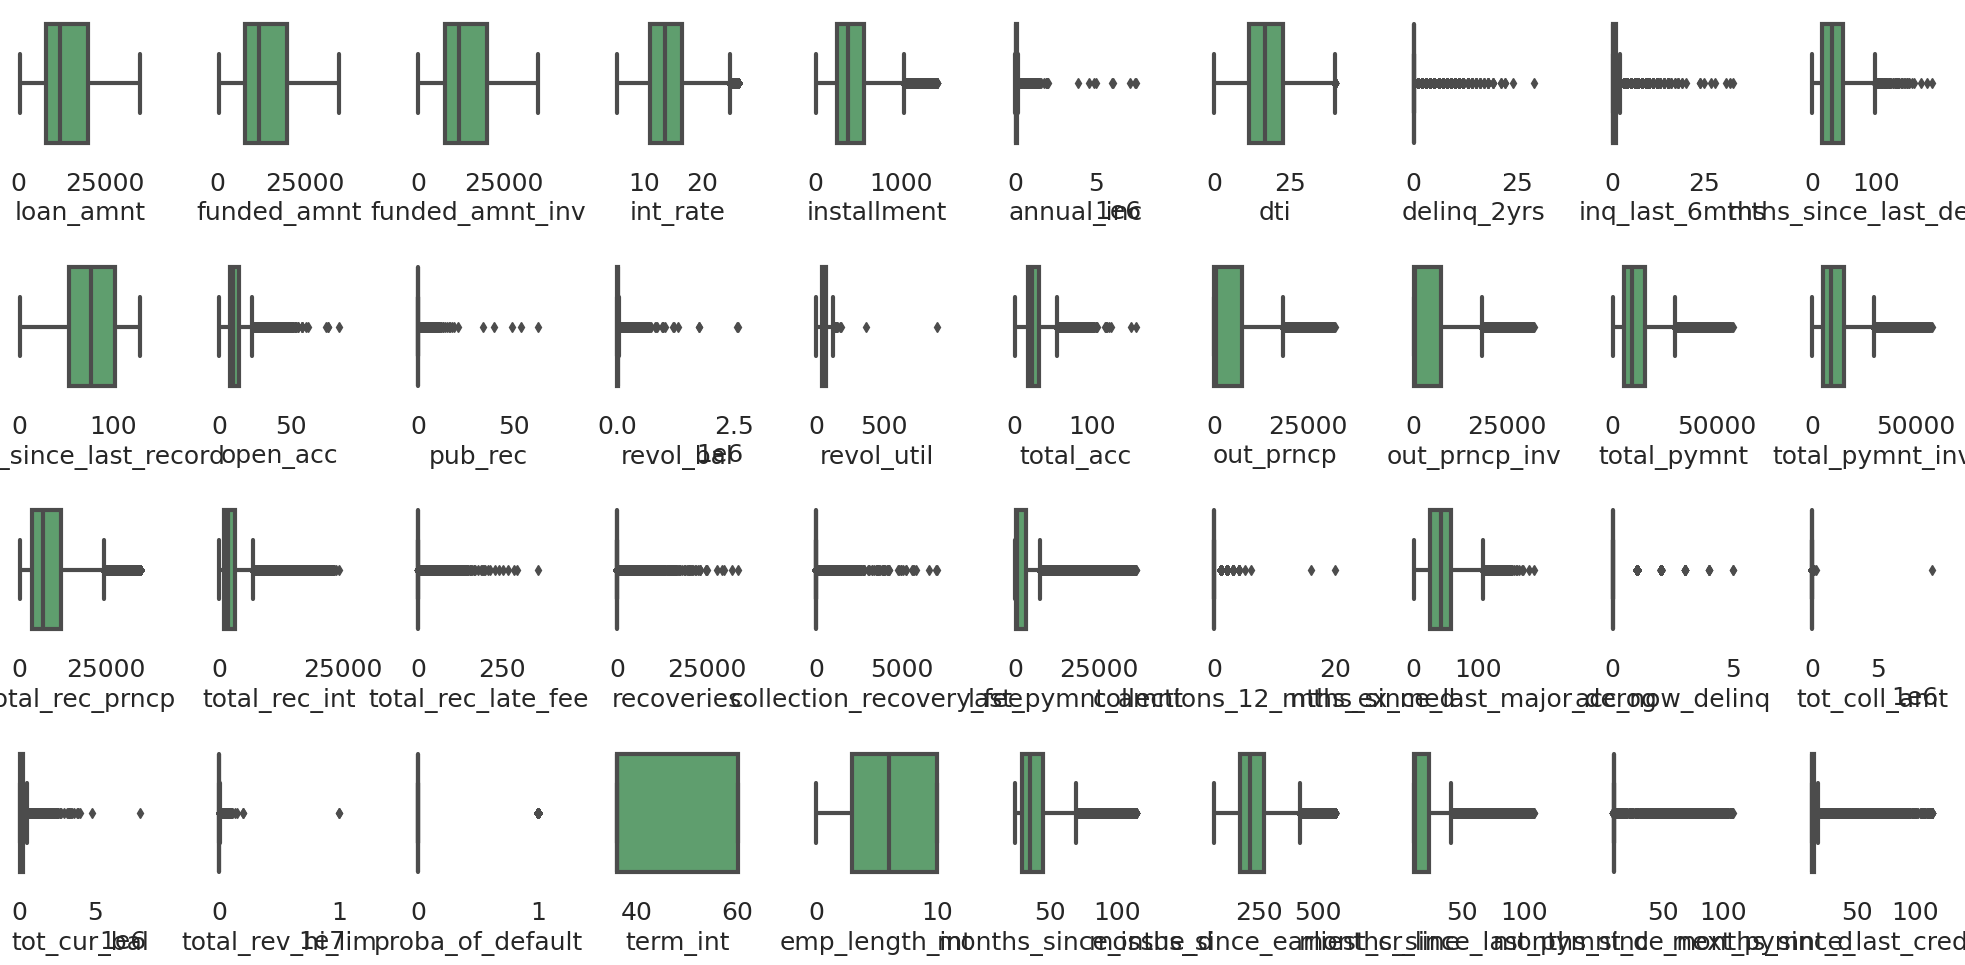

In [ ]:
# Make boxplot to show the outliers

fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(20,10))

for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], color='g', ax=axs[i//10, i%10])

plt.tight_layout()
plt.show()

- There are several columns with global outliers that are very far from their distribution.
- The columns are `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim`
- The outliers of the three columns will be reduced using the manual method because many features contain outliers (the variance is very high)

In [ ]:
from scipy import stats

In [ ]:
# Drop the outlier

print('Before drop rows:', df.shape)

df.drop(df[df['tot_coll_amt'] > 9000000].index, inplace=True)
df.drop(df[df['tot_cur_bal'] > 7000000].index, inplace=True)
df.drop(df[df['total_rev_hi_lim'] > 9000000].index, inplace=True)

print('After drop rows:', df.shape)

Before drop rows: (465116, 58)
After drop rows: (465112, 58)


Check that box plot features after dropped

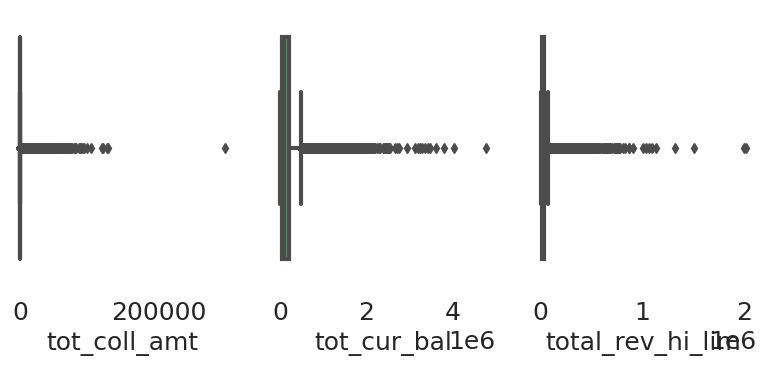

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8,4))
sns.boxplot(x='tot_coll_amt', data=df, color='g', ax=axs[0])
sns.boxplot(x='tot_cur_bal', data=df, color='g', ax=axs[1])
sns.boxplot(x='total_rev_hi_lim', data=df, color='g', ax=axs[2])
plt.tight_layout()
plt.show()

## Checking Invalid Values (Categorical Features)

In [ ]:
cats = df.select_dtypes(include=['object']).columns.tolist()
print(cats)

['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type']


In [ ]:
print(f"Unique values by features\n")

for cats_unique in cats:
    unique_values = df[cats_unique].unique()
    print(f"{cats_unique}:\n {unique_values}\n")

Unique values by features

term:
 [' 36 months' ' 60 months']

grade:
 ['B' 'C' 'A' 'E' 'F' 'D' 'G']

emp_title:
 [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length:
 ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership:
 ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status:
 ['Verified' 'Source Verified' 'Not Verified']

loan_status:
 ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']

pymnt_plan:
 ['n' 'y']

purpose:
 ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

title:
 ['Computer' 'bike' 'real estate busines

## Drop Features 2

In [ ]:
# Constant Features

df.drop(['application_type'], axis=1, inplace=True)
df.shape

(465112, 57)

# Exploratory Data Analysis - Insights

In [ ]:
df_eda = df.copy()
df_eda.sample(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
193491       4750         4750           4750.0   36 months     17.27   
303901      21075        21075          21075.0   60 months     12.49   
272424       8500         8500           8500.0   36 months      7.12   

        installment grade                     emp_title emp_length  \
193491       169.99     C                        meijer    2 years   
303901       474.04     B  Legislative Affairs Director    7 years   
272424       262.93     A              District Manager   < 1 year   

       home_ownership  annual_inc verification_status loan_status pymnt_plan  \
193491           RENT     16000.0        Not Verified  Fully Paid          n   
303901            OWN     70000.0            Verified     Current          n   
272424           RENT     87000.0        Not Verified     Current          n   

                   purpose               title addr_state    dti  delinq_2yrs  \
193491  debt_consolidation        To pay bills         OH   9.90          0.0   
303901                 car       Car financing         DC  26.25          0.0   
272424  debt_consolidation  Debt consolidation         NC  12.59          0.0   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
193491             1.0                     NaN                     NaN   
303901             1.0                    36.0                     NaN   
272424             0.0                     NaN                     NaN   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
193491       4.0      0.0       1107        21.7        6.0   
303901      12.0      0.0      15357        33.0       26.0   
272424      11.0      0.0       9129        37.1       16.0   

       initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
193491                   w       0.00           0.00  5566.088555   
303901                   f   16963.44       16963.44  7110.600000   
272424                   w    5407.54        5407.54  3674.300000   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
193491          5566.09          4750.00         816.09                 0.0   
303901          7110.60          4111.56        2999.04                 0.0   
272424          3674.30          3092.46         581.84                 0.0   

        recoveries  collection_recovery_fee  last_pymnt_amnt  \
193491         0.0                      0.0           572.25   
303901         0.0                      0.0           474.04   
272424         0.0                      0.0           262.93   

        collections_12_mths_ex_med  mths_since_last_major_derog  \
193491                         0.0                          NaN   
303901                         0.0                         36.0   
272424                         0.0                          NaN   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
193491             0.0           0.0       1107.0            5100.0   
303901             0.0           0.0     511065.0           46500.0   
272424             0.0           0.0      42506.0           24600.0   

        proba_of_default  term_int  emp_length_int date_issue_d  \
193491                 0        36             2.0   2012-10-01   
303901                 0        60             7.0   2014-10-01   
272424                 0        36             0.0   2014-10-01   

        months_since_issue_d date_earliest_cr_line  \
193491                    50            2006-09-01   
303901                    26            1997-10-01   
272424                    26            1997-02-01   

        months_since_earliest_cr_line date_last_pymnt_d  \
193491                          123.0        2014-07-01   
303901                          230.0        2016-01-01   
272424                          238.0        2015-12-01   

        months_since_last_pymnt_d date_next_pymnt_d  \
193491                       29.0               NaT   


- Dikarenakan variabel terlalu banyak untuk dianalisis, sehingga untuk kali ini fitur `loan_amnt` akan menjadi fokus analisa.
- Hal ini bertujuan untuk melihat perubahan permohonan pinjaman dari tahun ke tahun dan pengaruhnya terhadap variabel lain.

## Timeseries Chart

In [ ]:
df_datetime = df_eda.select_dtypes('datetime').columns.tolist()
print(df_datetime)

['date_issue_d', 'date_earliest_cr_line', 'date_last_pymnt_d', 'date_next_pymnt_d', 'date_last_credit_pull_d']


### Issue Date on Loan Amount

In [ ]:
df_eda['year_issue_d'] = df_eda['date_issue_d'].dt.year
df_eda['month_issue_d'] = df_eda['date_issue_d'].dt.month

df_viz1 = df_eda.groupby(['year_issue_d', 'month_issue_d']).agg({'loan_amnt' : 'mean'}).reset_index()
df_viz1.columns = ['Year_Join', 'Month_Join', 'Average_Loan']
df_viz1

Year_Join  Month_Join  Average_Loan
0        2007           6   3827.083333
1        2007           7   5528.968254
2        2007           8   6963.513514
3        2007           9   7036.792453
4        2007          10   7222.355769
5        2007          11   9005.803571
6        2007          12  11002.485380
7        2008           1   9593.442623
8        2008           2   9670.669935
9        2008           3  10332.000000
10       2008           4   9397.200772
11       2008           5   5468.695652
12       2008           6   5323.991935
13       2008           7   6074.290780
14       2008           8   5924.500000
15       2008           9   5573.245614
16       2008          10   7889.754098
17       2008          11   9879.904306
18       2008          12  10138.789683
19       2009           1   9182.620818
20       2009           2   8999.750831
21       2009           3   9435.714286
22       2009           4   9247.672673
23       2009           5   9576.256983
24       2009           6   8848.029557
25       2009           7   9450.980392
26       2009           8   9677.865169
27       2009           9  10073.422091
28       2009          10  10421.144279
29       2009          11  10346.547800
30       2009          12  10817.313546
31       2010           1  11194.461305
32       2010           2  10938.235294
33       2010           3  10464.673913
34       2010           4  10429.203297
35       2010           5  10726.137513
36       2010           6  10116.681777
37       2010           7   9914.036545
38       2010           8  10293.003413
39       2010           9  10296.208930
40       2010          10  10660.475997
41       2010          11  11027.393617
42       2010          12  10700.149925
43       2011           1  10737.336483
44       2011           2  11232.824575
45       2011           3  11437.595156
46       2011           4  11224.311780
47       2011           5  11334.205882
48       2011           6  11421.426616
49       2011           7  11384.229535
50       2011           8  12010.629208
51       2011           9  12484.191355
52       2011          10  12971.946023
53       2011          11  12690.827338
54       2011          12  13958.498896
55       2012           1  13140.460146
56       2012           2  14082.554730
57       2012           3  13565.499485
58       2012           4  13016.385187
59       2012           5  13260.360825
60       2012           6  13157.072498
61       2012           7  13031.019019
62       2012           8  12930.390163
63       2012           9  12652.775037
64       2012          10  13105.434261
65       2012          11  13738.155416
66       2012          12  15505.886977
67       2013           1  15288.618479
68       2013           2  15898.410961
69       2013           3  15420.141749
70       2013           4  14875.348293
71       2013           5  14297.008423
72       2013           6  14506.950704
73       2013           7  14332.782781
74       2013           8  14213.383319
75       2013           9  14472.283279
76       2013          10  14496.261632
77       2013          11  14668.657354
78       2013          12  14919.892132
79       2014           1  14887.599525
80       2014           2  15069.670785
81       2014           3  14877.537377
82       2014           4  14739.809847
83       2014           5  14692.366472
84       2014           6  14897.266628
85       2014           7  14779.980846
86       2014           8  14948.800831
87       2014           9  15034.130846
88       2014          10  14740.610699
89       2014          11  14904.905589
90       2014          12  15375.801032

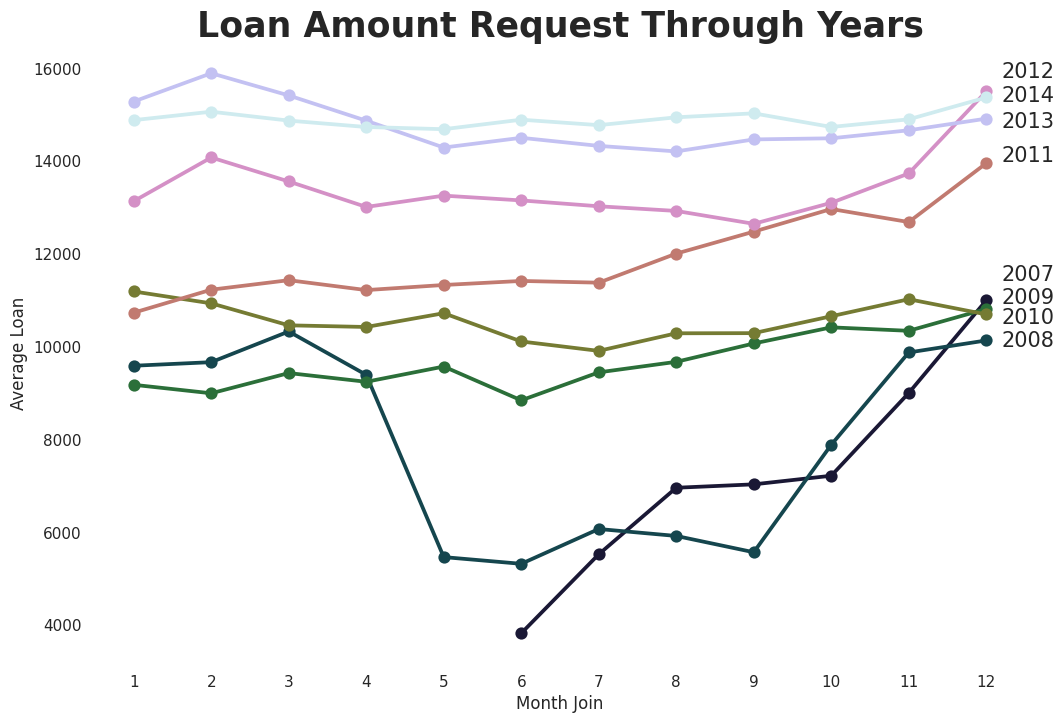

In [ ]:
ax = sns.set(rc={'figure.figsize':(12,8)})
ax = sns.pointplot(x='Month_Join', y="Average_Loan", data=df_viz1, hue="Year_Join", palette="cubehelix")
ax.patch.set_facecolor('white')
ax.legend(title='Year_Join', loc='best')
ax.get_legend().remove() # hide this code if you wanna show the legend in the plot
plt.title("Loan Amount Request Through Years",fontsize=25, fontweight="bold", fontname='Tw Cen MT')
plt.xlabel('Month Join', fontname='Tw Cen MT')
plt.ylabel('Average Loan', fontname='Tw Cen MT')
plt.text(11.2, 15805,"2012",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 15275,"2014",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 14719,"2013",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 13985,"2011",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 11419,"2007",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 10917,"2009",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 10500,"2010",fontsize= 15, fontname='Tw Cen MT')
plt.text(11.2, 10000,"2008",fontsize= 15, fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

## Scatter Plot

### Loan Amount vs Funded Amount

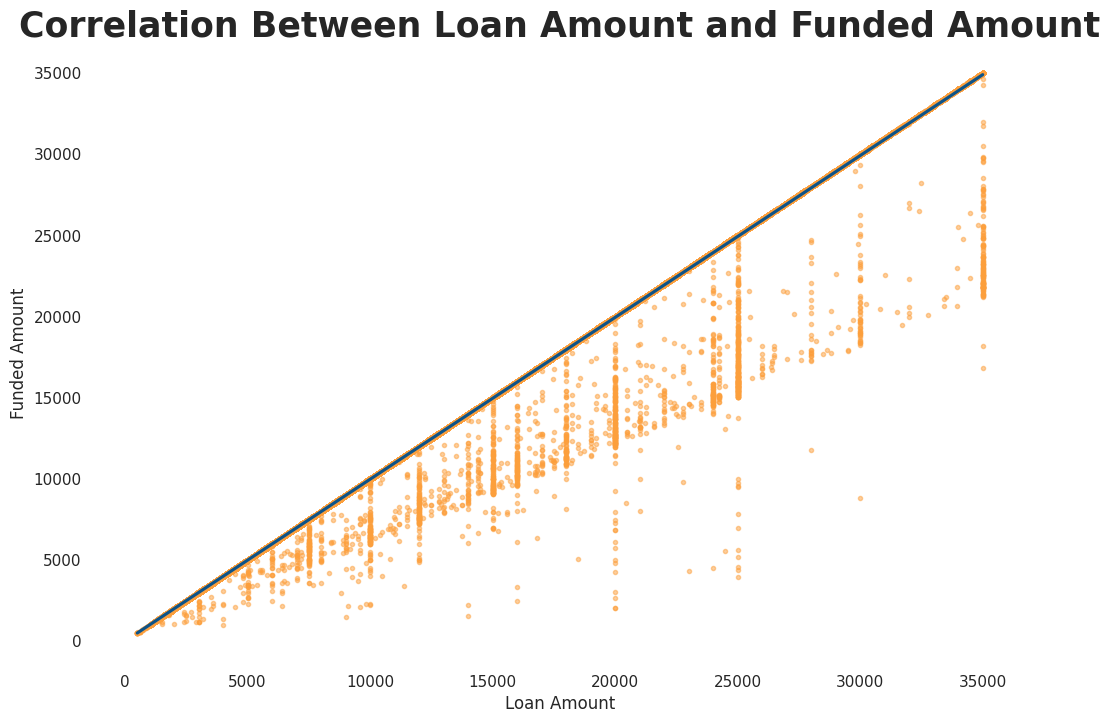

In [ ]:
ax = sns.regplot(x='loan_amnt', y='funded_amnt', data=df_eda, marker=".", scatter_kws={'color':'#fc9f3c','alpha':0.5}, line_kws={'color':"#0d5388"})
ax.patch.set_facecolor('white')
plt.xlabel('Loan Amount', fontname='Tw Cen MT')
plt.ylabel('Funded Amount', fontname='Tw Cen MT')
plt.title('Correlation Between Loan Amount and Funded Amount', fontsize=25, fontweight="bold", fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

## Persona Plot

### Count Ratio Bad Loan & Good Loan

In [ ]:
df_pp1 = df_eda.groupby(['proba_of_default']).agg({'loan_amnt':'count'}).reset_index()
df_pp1.columns = ['proba_of_default','total_user']
df_pp1['Ratio'] = round(df_pp1['total_user']/df_pp1['total_user'].sum()*100,0)
df_pp1

proba_of_default  total_user  Ratio
0                 0      414292   89.0
1                 1       50820   11.0

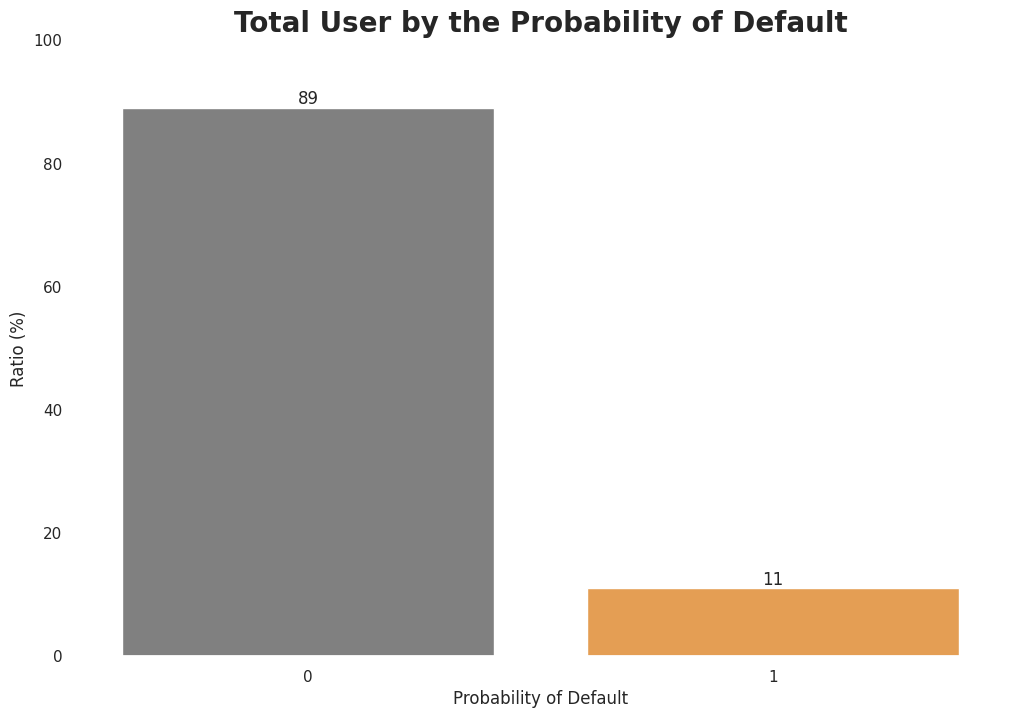

In [ ]:
cols = ['#fc9f3c' if x == 11 else 'grey' for x in df_pp1['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp1,
            x='proba_of_default',
            y='Ratio',
            palette = cols)

plt.title('Total User by the Probability of Default', size=20, weight='bold', fontname='Tw Cen MT')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Probability of Default', fontname='Tw Cen MT')
plt.ylabel('Ratio (%)', fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.ylim(0,100)
plt.show()

### Count Ratio of Purpose

In [ ]:
df_pp2 = df_eda.groupby(['purpose']).agg({'loan_amnt':'count'}).reset_index()
df_pp2.columns = ['purpose','total_user']
df_pp2['Ratio'] = round(df_pp2['total_user']/df_pp2['total_user'].sum()*100,1)
df_pp2 = df_pp2.sort_values(by =['Ratio'], ascending=False).reset_index()
df_pp2 = df_pp2.drop(columns=['index'])
df_pp2

purpose  total_user  Ratio
0   debt_consolidation      273587   58.8
1          credit_card      103824   22.3
2     home_improvement       26460    5.7
3                other       23625    5.1
4       major_purchase        9807    2.1
5       small_business        6994    1.5
6                  car        5380    1.2
7              medical        4586    1.0
8               moving        2987    0.6
9                house        2269    0.5
10            vacation        2478    0.5
11             wedding        2343    0.5
12         educational         422    0.1
13    renewable_energy         350    0.1

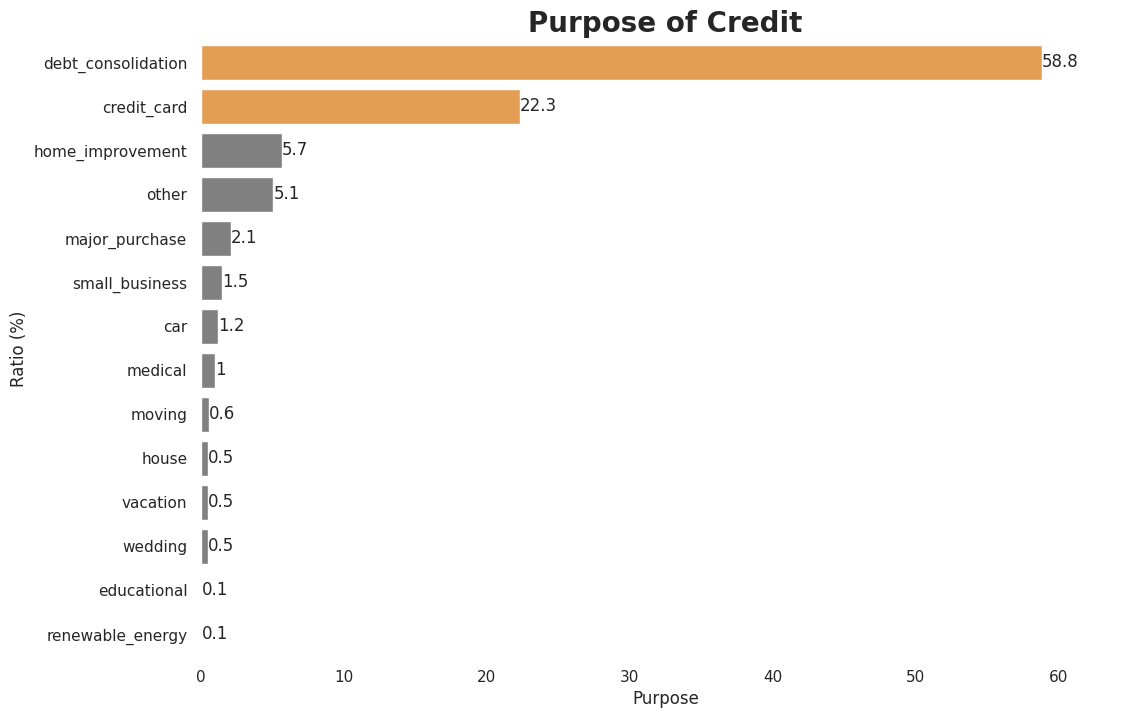

In [ ]:
cols = ['#fc9f3c' if x >= 12 else 'grey' for x in df_pp2['Ratio']]
ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp2,
            x='Ratio',
            y='purpose',
            palette = cols)

plt.title('Purpose of Credit', size=20, weight='bold', fontname='Tw Cen MT')
ax.bar_label(ax.containers[0])
ax.patch.set_facecolor('white')
plt.xlabel('Purpose', fontname='Tw Cen MT')
plt.ylabel('Ratio (%)', fontname='Tw Cen MT')
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.xlim(0,65)
plt.show()

Personal loan purposes vs. Business loan purposes:
- Personal loan purposes: debt_consolidation, credit_card, home_improvement, major_purchase, car, medical, moving, house, vacation, wedding, other
- Business loan purposes: small_business, educational, renewable_energy

In [ ]:
df_eda['purpose_sum'] = np.where(df_eda['purpose']=='small_business', 'business loan',
                           np.where(df_eda['purpose']=='educational', 'business loan',
                                np.where(df_eda['purpose']=='renewable_energy', 'business loan','personal loan')))
df_eda.head(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       5000         5000           4975.0   36 months     10.65       162.87   
1       2500         2500           2500.0   60 months     15.27        59.83   
2       2400         2400           2400.0   36 months     15.96        84.33   

  grade emp_title emp_length home_ownership  annual_inc verification_status  \
0     B       NaN  10+ years           RENT     24000.0            Verified   
1     C     Ryder   < 1 year           RENT     30000.0     Source Verified   
2     C       NaN  10+ years           RENT     12252.0        Not Verified   

   loan_status pymnt_plan         purpose                 title addr_state  \
0   Fully Paid          n     credit_card              Computer         AZ   
1  Charged Off          n             car                  bike         GA   
2   Fully Paid          n  small_business  real estate business         IL   

     dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0  27.65          0.0             1.0                     NaN   
1   1.00          0.0             5.0                     NaN   
2   8.72          0.0             2.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0  5861.071414   
1        4.0                   f        0.0            0.0  1008.710000   
2       10.0                   f        0.0            0.0  3003.653644   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                 0.0   
1          1008.71           456.46         435.17                 0.0   
2          3003.65          2400.00         603.65                 0.0   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0        0.00                     0.00           171.62   
1      117.08                     1.11           119.66   
2        0.00                     0.00           649.91   

   collections_12_mths_ex_med  mths_since_last_major_derog  acc_now_delinq  \
0                         0.0                          NaN             0.0   
1                         0.0                          NaN             0.0   
2                         0.0                          NaN             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  proba_of_default  term_int  \
0           NaN          NaN               NaN                 0        36   
1           NaN          NaN               NaN                 1        60   
2           NaN          NaN               NaN                 0        36   

   emp_length_int date_issue_d  months_since_issue_d date_earliest_cr_line  \
0            10.0   2011-12-01                    60            1985-01-01   
1             0.0   2011-12-01                    60            1999-04-01   
2            10.0   2011-12-01                    60            2001-11-01   

   months_since_earliest_cr_line date_last_pymnt_d  months_since_last_pymnt_d  \
0                          383.0        2015-01-01                       23.0   
1                          212.0        2013-04-01                       44.0   
2                          181.0        2014-06-01                       30.0   

  date_next_pymnt_d  months_since_next_pymnt_d date_last_credit_pull_d  \
0               NaT                        NaN              2016-01-01   
1               NaT                        NaN              2013-09-01   
2               NaT                        NaN              2016-01-01   

   months_since_last_credit_pull_d  year_issue_d  month_issue_d    purpose_sum  
0                        

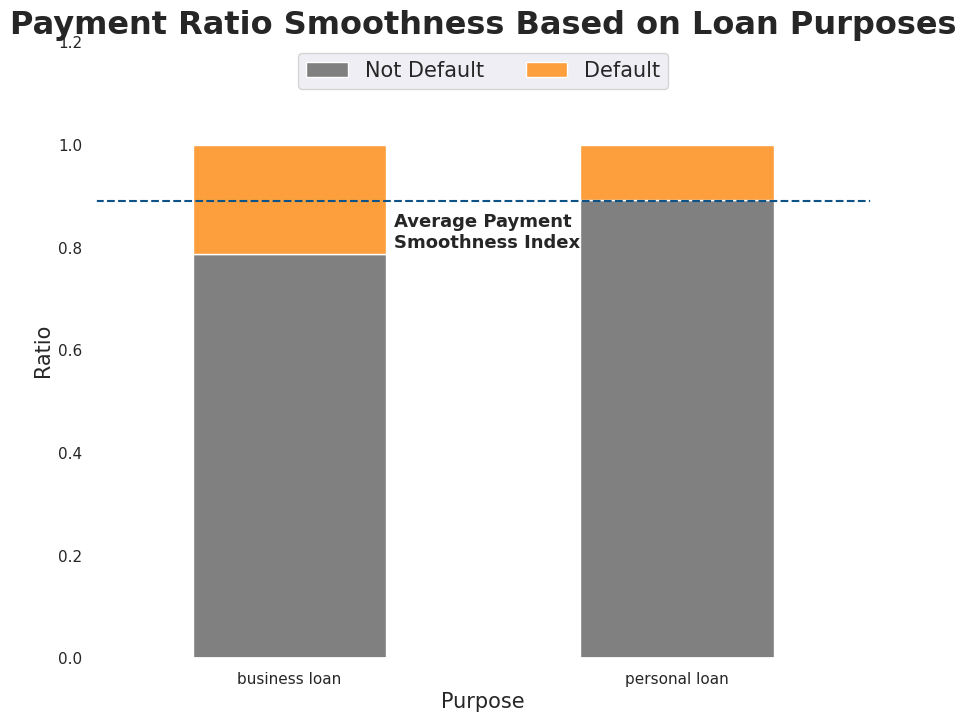

In [ ]:
font = fm.FontProperties(family='Tw Cen MT', size=15)

df_pp3 = df_eda[['purpose_sum','proba_of_default']]
df_pp3['proba_of_default'] = np.where(df_pp3['proba_of_default']==1,'Default','Not Default')

cross_tab_prop = pd.crosstab(index=df_pp3['purpose_sum'],
                             columns=df_pp3['proba_of_default'],
                             normalize="index")
cross_tab_prop = cross_tab_prop[['Not Default','Default']]


ax = cross_tab_prop.plot(kind='bar',
                    stacked=True,
                    color=['Grey','#fc9f3c'],
                    figsize=(10, 8))

plt.legend(loc="upper center", ncol=5, prop=font)
ax.patch.set_facecolor('white')
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="#0d5388", linestyle ="--")
plt.title("Payment Ratio Smoothness Based on Loan Purposes",fontsize=23,weight='bold',loc='center',fontname='Tw Cen MT')
plt.text(x=0.27,y=cross_tab_prop['Not Default'].mean()-0.04,s='Average Payment \nSmoothness Index',fontsize=13,weight='bold', fontname='Tw Cen MT')
plt.xlabel("Purpose",fontsize = 15, fontname='Tw Cen MT')
plt.ylabel("Ratio",fontsize = 15, fontname='Tw Cen MT')
plt.ylim(0,1.2)
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks(fontname='Tw Cen MT')
plt.show()

### Count Ratio of Initial List Status

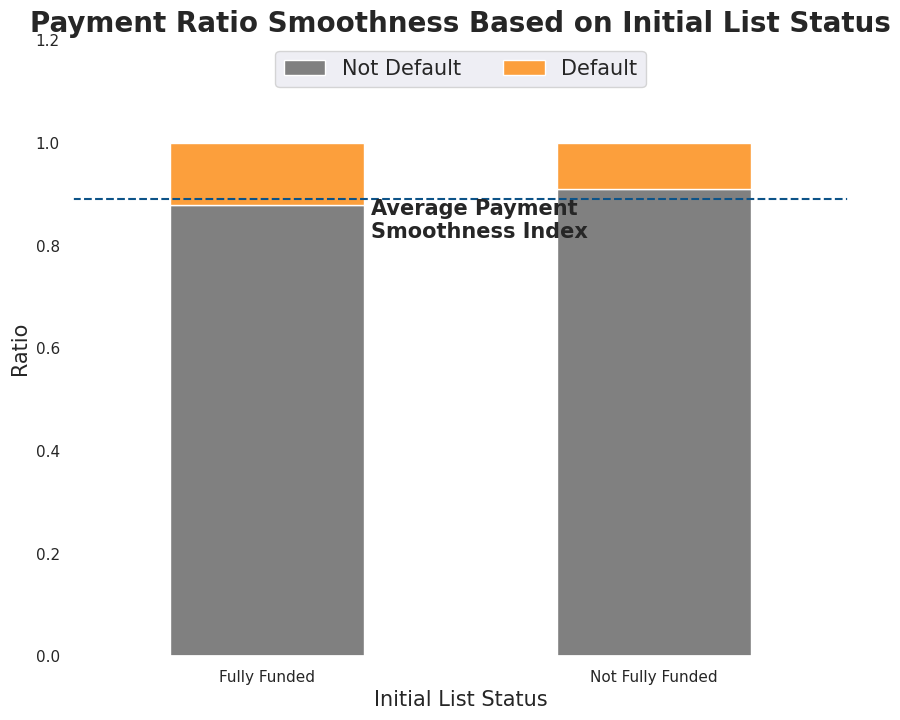

In [ ]:
df_pp5 = df_eda[['initial_list_status','proba_of_default']]
df_pp5['proba_of_default'] = np.where(df_pp5['proba_of_default']==1,'Default','Not Default')
df_pp5['initial_list_status'] = np.where(df_pp5['initial_list_status']=='f','Fully Funded','Not Fully Funded')

cross_tab_prop2 = pd.crosstab(index=df_pp5['initial_list_status'],
                             columns=df_pp5['proba_of_default'],
                             normalize="index")
cross_tab_prop2 = cross_tab_prop2[['Not Default','Default']]


ax = cross_tab_prop2.plot(kind='bar',
                    stacked=True,
                    color=['Grey','#fc9f3c'],
                    figsize=(10, 8))

plt.legend(loc="upper center", ncol=5, prop=font)
ax.patch.set_facecolor('white')
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="#0d5388", linestyle ="--")
plt.title("Payment Ratio Smoothness Based on Initial List Status",fontsize=20,weight='bold',loc='center',fontname='Tw Cen MT')
plt.text(x=0.27,y=cross_tab_prop2['Not Default'].mean()-0.08,s='Average Payment \nSmoothness Index',fontsize=15,weight='bold', fontname='Tw Cen MT')
plt.xlabel("Initial List Status",fontsize = 15, fontname='Tw Cen MT')
plt.ylabel("Ratio",fontsize = 15, fontname='Tw Cen MT')
plt.ylim(0,1.2)
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

### Interest Rate Ratio

In [ ]:
df_eda['int_rate_group'] = np.where(df_eda['int_rate']<11, '5%-10%',
                                 np.where(df_eda['int_rate']<15, '10%-14%',
                                          np.where(df_eda['int_rate']<19, '14%-18%',
                                                   np.where(df_eda['int_rate']<23, '18%-22%','22%-26%'))))

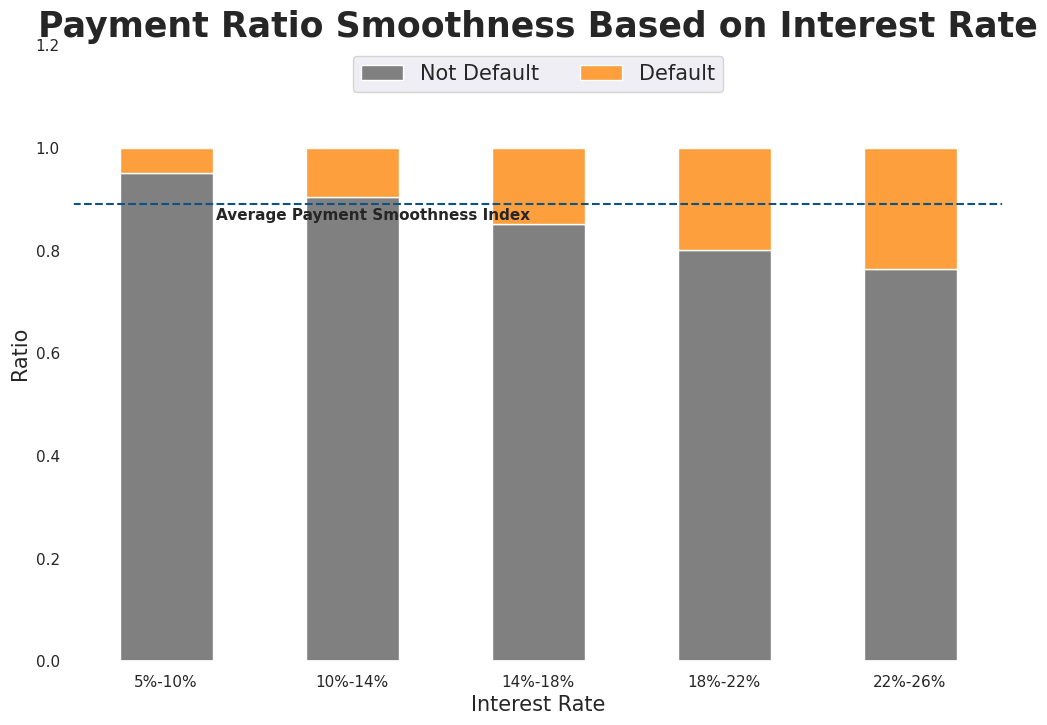

In [ ]:
df_pp6 = df_eda[['int_rate_group','proba_of_default']]
df_pp6['proba_of_default'] = np.where(df_pp6['proba_of_default']==1,'Default','Not Default')

cross_tab_prop3 = pd.crosstab(index=df_pp6['int_rate_group'],
                             columns=df_pp6['proba_of_default'],
                             normalize="index")
cross_tab_prop3 = cross_tab_prop3[['Not Default','Default']]

#Agar Kolom Kategorikal terurut
cross_tab_prop3['sort_bin'] = np.where(cross_tab_prop3.index=='5%-10%',1,
                                       np.where(cross_tab_prop3.index=='10%-14%',2,
                                                np.where(cross_tab_prop3.index=='14%-18%',3,
                                                         np.where(cross_tab_prop3.index=='18%-22%',4,5))))

cross_tab_prop3 = cross_tab_prop3.sort_values(by='sort_bin', ascending=True)
cross_tab_prop3 = cross_tab_prop3.drop('sort_bin', axis=1)
cross_tab_prop3

ax = cross_tab_prop3.plot(kind='bar',
                          stacked=True,
                          color=['Grey','#fc9f3c'],
                          figsize=(12, 8))

plt.legend(loc="upper center", ncol=5, prop=font)
ax.patch.set_facecolor('white')
sns.set(font_scale=1.5)
plt.axhline(y = df_eda['proba_of_default'].value_counts(True)[0], color ="#0d5388", linestyle ="--")
plt.title("Payment Ratio Smoothness Based on Interest Rate",fontsize=25,weight='bold',loc='center',fontname='Tw Cen MT')
plt.text(x=0.27,y=cross_tab_prop['Not Default'].mean()+0.02,s='Average Payment Smoothness Index',fontsize=11,weight='bold',fontname='Tw Cen MT')
plt.xlabel("Interest Rate",fontsize = 15, fontname='Tw Cen MT')
plt.ylabel("Ratio",fontsize = 15, fontname='Tw Cen MT')
plt.ylim(0,1.2)
plt.xticks(rotation = 0, fontname='Tw Cen MT')
plt.yticks( fontname='Tw Cen MT')
plt.show()

# Exploratory Data Analysis - Redundant Features

## Drop Features 3

In [ ]:
# Drop after EDA - Insights

cols_to_drop2 = ['loan_status',
                 'term',
                 'emp_length',
                 'date_issue_d',
                 'date_earliest_cr_line',
                 'date_last_pymnt_d',
                 'date_next_pymnt_d',
                 'date_last_credit_pull_d']
df.drop(cols_to_drop2, axis=1, inplace=True)

### Numerical Features (Drop High Correlation)

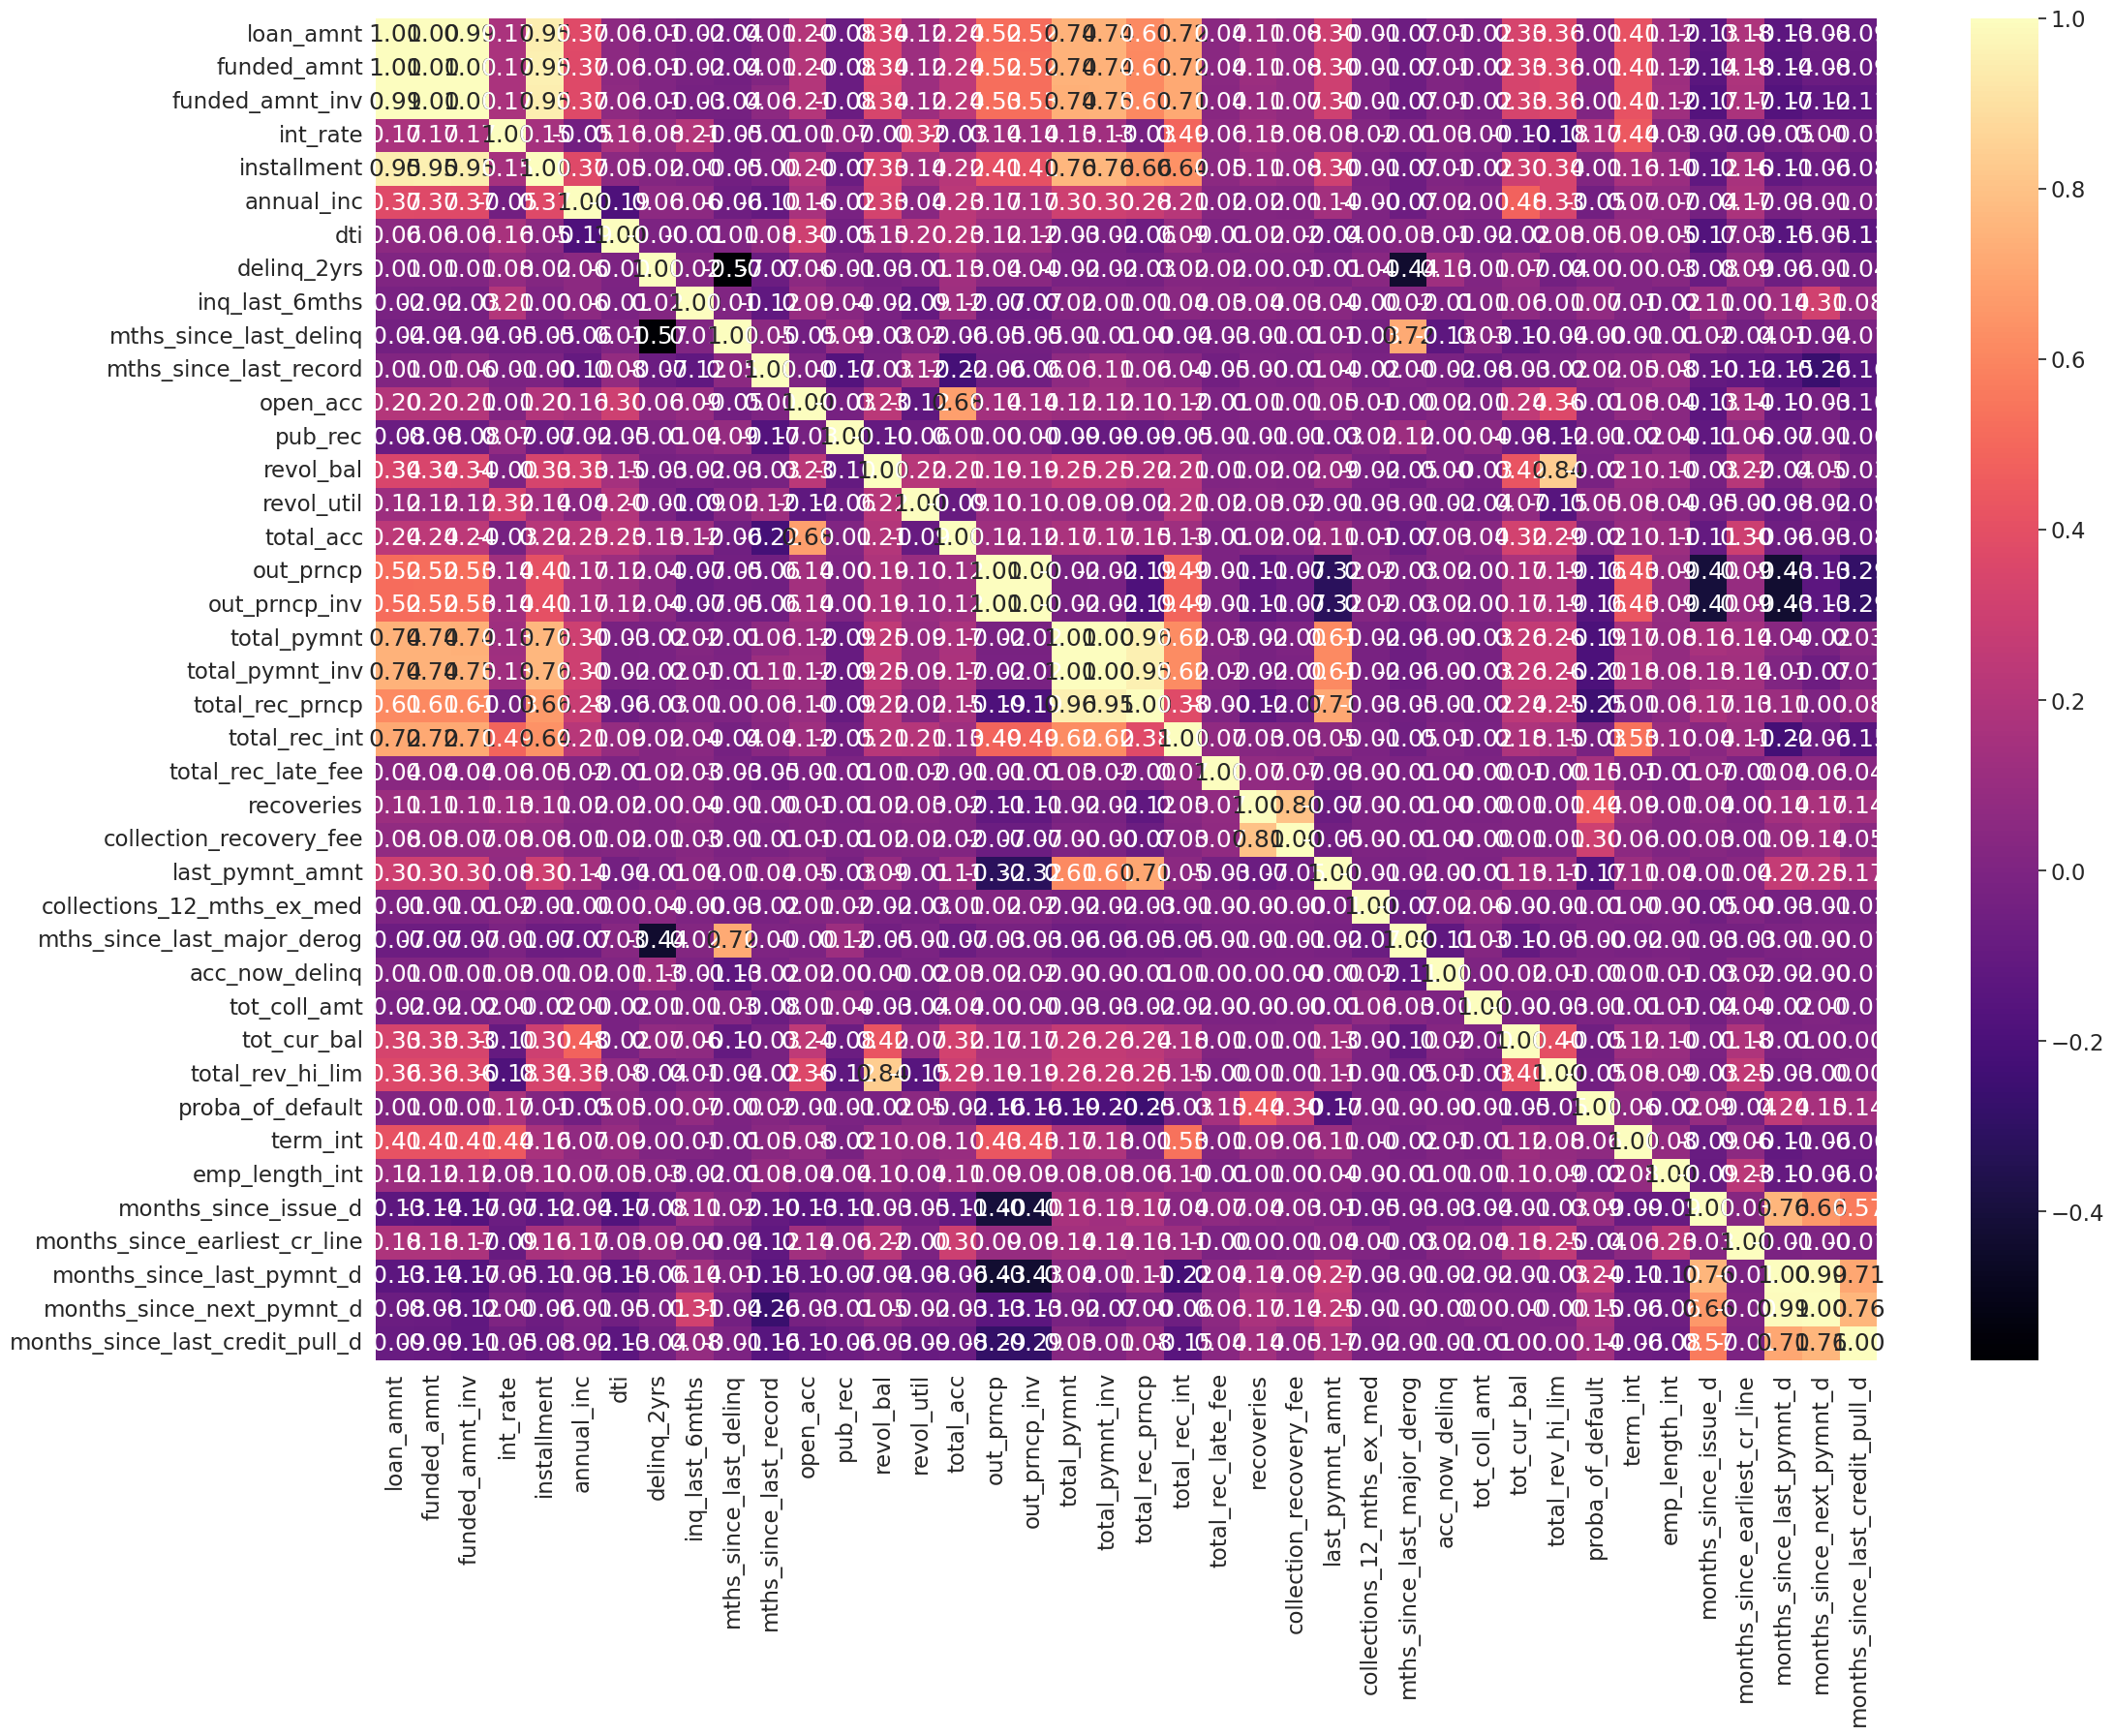

(465112, 49)

In [ ]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()
display(df.shape)

- Hasil heatmap korelasi menunjukkan terdapat banyak fitur yang redundan.
- Oleh sebab itu, fitur yang memiliki korelasi > 0.7 akan dihapus salah satunya agar menghindari multikolinieritas.
- Nilai batas korelasi 0.7 memberikan trade-off yang baik antara menghilangkan fitur yang redundan dan mempertahankan fitur yang berbeda-beda namun masih berkaitan satu sama lain. Nilai korelasi di bawah 0.7 umumnya dianggap sebagai korelasi yang lemah atau tidak signifikan, sementara nilai di atas 0.7 dianggap sebagai korelasi yang kuat dan mengandung informasi yang redundan. Oleh karena itu, nilai batas korelasi 0.7 sering dianggap sebagai batas yang tepat untuk mempertimbangkan kedua hal ini.

In [ ]:
# Compute the absolute correlation matrix
corr_matrix = np.abs(df.corr())

# Select upper triangle of the correlation matrix
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper_triangle = corr_matrix.where(mask)

# Find columns with correlation greater than 0.7
to_drop_hicorr = [col for col in upper_triangle.columns if any (upper_triangle[col].gt(0.7))]
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'months_since_last_pymnt_d',
 'months_since_next_pymnt_d',
 'months_since_last_credit_pull_d']

In [ ]:
df.drop(to_drop_hicorr, axis=1, inplace=True)
df.shape

(465112, 34)

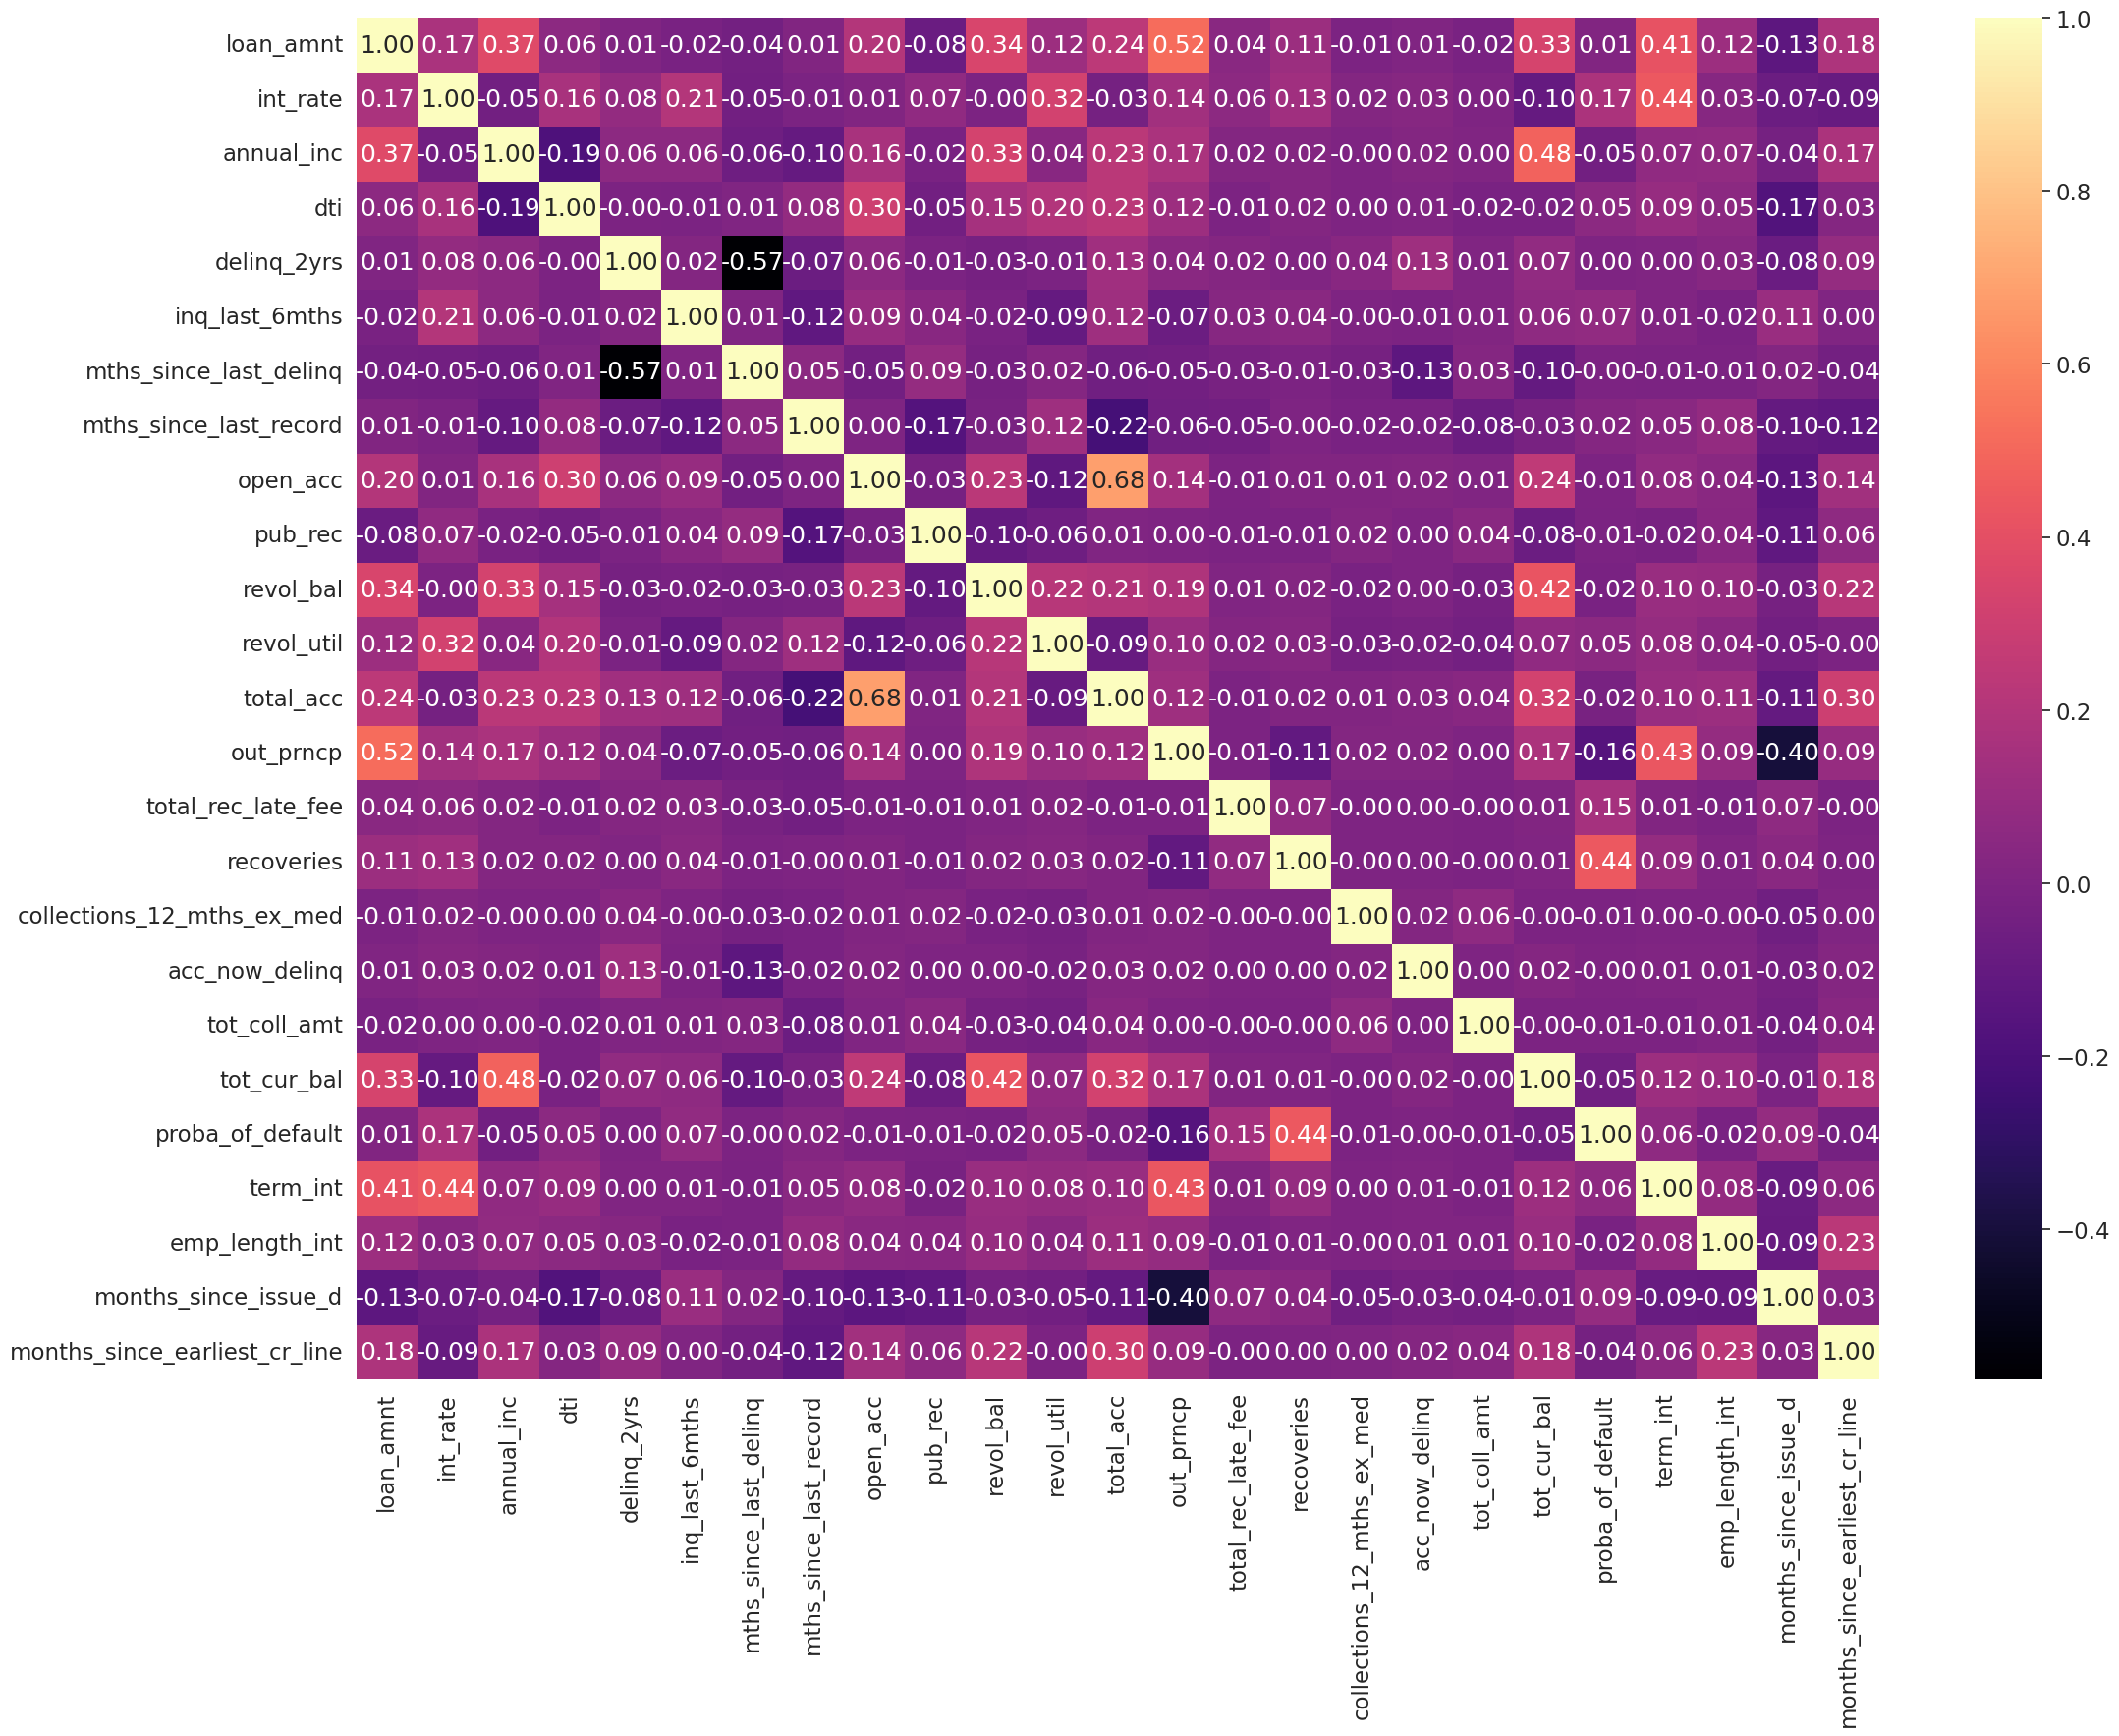

In [ ]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()

### Categorical Features (Drop High Cradinality)

In [ ]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

emp_title              205222
title                   62980
addr_state                 50
purpose                    14
grade                       7
home_ownership              6
verification_status         3
pymnt_plan                  2
initial_list_status         2
dtype: int64

- High cardinality (kardinalitas tinggi) adalah istilah yang digunakan dalam analisis data untuk menggambarkan sebuah kolom atau fitur yang memiliki banyak nilai unik atau kategori yang berbeda.
- Dari fitur-fitur di atas, fitur yang akan di drop adalah `emp_title`, `title` dan `addr_state`.
- Hal ini bertujuan untuk meningkatkan kinerja algoritma dan harapannya dapan menurunkan resiko overfitting.

In [ ]:
df.drop(['emp_title', 'title', 'addr_state'], axis=1, inplace=True)
df.shape

(465112, 31)

### Categorical Featurs (Drop Imbalance Class)

In [ ]:
# Make categorical features variabel

new_cats = df.select_dtypes(include=['object']).columns.tolist()
print(new_cats)

['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']


In [ ]:
print(f"Check Imbalance class by categorical features\n")

for imb_cats in new_cats:
    count_values = df[imb_cats].value_counts(normalize=True)*100
    print(f"{imb_cats}:\n{count_values}\n")

Check Imbalance class by categorical features

grade:
B    29.358520
C    26.872022
D    16.497102
A    16.045383
E     7.672776
F     2.840821
G     0.713377
Name: grade, dtype: float64

home_ownership:
MORTGAGE    50.569970
RENT        40.453697
OWN          8.926452
OTHER        0.038915
NONE         0.010750
ANY          0.000215
Name: home_ownership, dtype: float64

verification_status:
Verified           35.998856
Source Verified    32.174616
Not Verified       31.826528
Name: verification_status, dtype: float64

pymnt_plan:
n    99.998065
y     0.001935
Name: pymnt_plan, dtype: float64

purpose:
debt_consolidation    58.821746
credit_card           22.322365
home_improvement       5.688952
other                  5.079422
major_purchase         2.108524
small_business         1.503724
car                    1.156711
medical                0.985999
moving                 0.642211
vacation               0.532775
wedding                0.503750
house                  0.487839
educat

From above seen that
- 'pymnt_plan' having significant imbalance class, then we drop it.
- transform 'purpose' and 'home_ownership' to reduce the dimensionality of the data

In [ ]:
df.drop('pymnt_plan', axis=1, inplace=True)

# ** Final Feature Extraction

categories by mapping certain loan purposes to the label 'business loan' and all other purposes to 'personal loan'

In [ ]:
df['purpose'] = np.where(df['purpose']=='small_business', 'business loan',
                           np.where(df['purpose']=='educational', 'business loan',
                                np.where(df['purpose']=='renewable_energy', 'business loan','personal loa')))
df.head(3)

loan_amnt  int_rate grade home_ownership  annual_inc verification_status  \
0       5000     10.65     B           RENT     24000.0            Verified   
1       2500     15.27     C           RENT     30000.0     Source Verified   
2       2400     15.96     C           RENT     12252.0        Not Verified   

         purpose    dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0   personal loa  27.65          0.0             1.0                     NaN   
1   personal loa   1.00          0.0             5.0                     NaN   
2  business loan   8.72          0.0             2.0                     NaN   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   

   total_acc initial_list_status  out_prncp  total_rec_late_fee  recoveries  \
0        9.0                   f        0.0                 0.0        0.00   
1        4.0                   f        0.0                 0.0      117.08   
2       10.0                   f        0.0                 0.0        0.00   

   collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  \
0                         0.0             0.0           NaN          NaN   
1                         0.0             0.0           NaN          NaN   
2                         0.0             0.0           NaN          NaN   

   proba_of_default  term_int  emp_length_int  months_since_issue_d  \
0                 0        36            10.0                    60   
1                 1        60             0.0                    60   
2                 0        36            10.0                    60   

   months_since_earliest_cr_line  
0                          383.0  
1                          212.0  
2                          181.0

In [ ]:
# Modifying 'home_ownership'

df['home_ownership'] = np.where(df['home_ownership'].isin(['ANY', 'OTHER']), 'OTHER', df['home_ownership'])
df['home_ownership'].value_counts()

MORTGAGE    235207
RENT        188155
OWN          41518
OTHER          182
NONE            50
Name: home_ownership, dtype: int64

if the value in the 'home_ownership' column is 'ANY' or 'OTHER', it replaces that value with 'OTHER'

# Handling Missing Values

## Dropping Columns with more than 50% Missing Values
- Removing columns that have more than 50% missing values is a common practice in data pre-processing because these columns generally do not provide enough useful information for analysis or modeling. When a column has a high percentage of missing values, it can introduce bias or noise into the analysis or modeling process.

In [ ]:
df.isna().sum().sort_values(ascending=False) * 100 / df.shape[0]

mths_since_last_record           86.594842
mths_since_last_delinq           53.713299
tot_cur_bal                      15.081099
tot_coll_amt                     15.081099
emp_length_int                    4.424311
revol_util                        0.073101
collections_12_mths_ex_med        0.031175
acc_now_delinq                    0.006235
total_acc                         0.006235
pub_rec                           0.006235
open_acc                          0.006235
months_since_earliest_cr_line     0.006235
inq_last_6mths                    0.006235
delinq_2yrs                       0.006235
annual_inc                        0.000860
months_since_issue_d              0.000000
grade                             0.000000
term_int                          0.000000
proba_of_default                  0.000000
home_ownership                    0.000000
verification_status               0.000000
purpose                           0.000000
recoveries                        0.000000
total_rec_l

In [ ]:
df.drop(['mths_since_last_record','mths_since_last_delinq'] , axis=1, inplace=True)

## Filling Missing Values (Step by Step)
- Missing values for features will be filled with their median values.
- This was chosen because during pre-processing a random undersampling will be carried out to around 90 thousand data. if filled in 0 or -1 (data outside the distribution) it is unfortunate for optimal data distribution.

In [ ]:
display(df['tot_cur_bal'].describe())
print('Total Null:',df['tot_cur_bal'].isna().sum())

count    3.949680e+05
mean     1.387374e+05
std      1.512793e+05
min      0.000000e+00
25%      2.863500e+04
50%      8.155300e+04
75%      2.089240e+05
max      4.772549e+06
Name: tot_cur_bal, dtype: float64

Total Null: 70144


In [ ]:
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)

In [ ]:
display(df['tot_coll_amt'].describe())
print('Total Null:',df['tot_coll_amt'].isna().sum())

count    394968.000000
mean        168.288882
std        1583.410877
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      296368.000000
Name: tot_coll_amt, dtype: float64

Total Null: 70144


In [ ]:
df['tot_coll_amt'].fillna(0, inplace=True)

In [ ]:
display(df['emp_length_int'].describe())
print('Total Null:',df['emp_length_int'].isna().sum())

count    444534.000000
mean          5.992073
std           3.626966
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

Total Null: 20578


In [ ]:
df['emp_length_int'].fillna(df['emp_length_int'].median(), inplace=True)

In [ ]:
display(df['revol_util'].describe())
print('Total Null:',df['revol_util'].isna().sum())

count    464772.000000
mean         56.188080
std          23.730662
min           0.000000
25%          39.200000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

Total Null: 340


In [ ]:
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [ ]:
display(df['collections_12_mths_ex_med'].describe())
print('Total Null:',df['collections_12_mths_ex_med'].isna().sum())

count    464967.000000
mean          0.009093
std           0.108716
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: collections_12_mths_ex_med, dtype: float64

Total Null: 145


In [ ]:
df['collections_12_mths_ex_med'].fillna(0, inplace=True)

In [ ]:
display(df['months_since_earliest_cr_line'].describe())
print('Total Null:',df['months_since_earliest_cr_line'].isna().sum())

count    465083.000000
mean        229.518617
std          84.822698
min          61.000000
25%         171.000000
50%         213.000000
75%         273.000000
max         575.000000
Name: months_since_earliest_cr_line, dtype: float64

Total Null: 29


In [ ]:
df['months_since_earliest_cr_line'].fillna(df['months_since_earliest_cr_line'].median(), inplace=True)

In [ ]:
display(df['total_acc'].describe())
print('Total Null:',df['total_acc'].isna().sum())

count    465083.000000
mean         25.056635
std          11.599590
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

Total Null: 29


In [ ]:
df['total_acc'].fillna(df['total_acc'].median(), inplace=True)

In [ ]:
display(df['acc_now_delinq'].describe())
print('Total Null:',df['acc_now_delinq'].isna().sum())

count    465083.000000
mean          0.003993
std           0.068583
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

Total Null: 29


In [ ]:
df['acc_now_delinq'].fillna(0, inplace=True)

In [ ]:
display(df['pub_rec'].describe())
print('Total Null:',df['pub_rec'].isna().sum())

count    465083.000000
mean          0.160113
std           0.509222
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

Total Null: 29


In [ ]:
df['pub_rec'].fillna(df['pub_rec'].median(), inplace=True)

In [ ]:
display(df['open_acc'].describe())
print('Total Null:',df['open_acc'].isna().sum())

count    465083.000000
mean         11.185963
std           4.987710
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64

Total Null: 29


In [ ]:
df['open_acc'].fillna(df['open_acc'].median(), inplace=True)

In [ ]:
display(df['inq_last_6mths'].describe())
print('Total Null:',df['inq_last_6mths'].isna().sum())

count    465083.000000
mean          0.804736
std           1.091566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64

Total Null: 29


In [ ]:
df['inq_last_6mths'].fillna(df['inq_last_6mths'].median(), inplace=True)

In [ ]:
display(df['delinq_2yrs'].describe())
print('Total Null:',df['delinq_2yrs'].isna().sum())

count    465083.000000
mean          0.284375
std           0.796834
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

Total Null: 29


In [ ]:
df['delinq_2yrs'].fillna(df['delinq_2yrs'].median(), inplace=True)

In [ ]:
display(df['annual_inc'].describe())
print('Total Null:',df['annual_inc'].isna().sum())

count    4.651080e+05
mean     7.324893e+04
std      5.442542e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.882025e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

Total Null: 4


In [ ]:
df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

In [ ]:
display(df.head())
print(df.shape)

loan_amnt  int_rate grade home_ownership  annual_inc verification_status  \
0       5000     10.65     B           RENT     24000.0            Verified   
1       2500     15.27     C           RENT     30000.0     Source Verified   
2       2400     15.96     C           RENT     12252.0        Not Verified   
3      10000     13.49     C           RENT     49200.0     Source Verified   
4       3000     12.69     B           RENT     80000.0     Source Verified   

         purpose    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0   personal loa  27.65          0.0             1.0       3.0      0.0   
1   personal loa   1.00          0.0             5.0       3.0      0.0   
2  business loan   8.72          0.0             2.0       2.0      0.0   
3   personal loa  20.00          0.0             1.0      10.0      0.0   
4   personal loa  17.94          0.0             0.0      15.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   
2       2956        98.5       10.0                   f        0.0   
3       5598        21.0       37.0                   f        0.0   
4      27783        53.9       38.0                   f      766.9   

   total_rec_late_fee  recoveries  collections_12_mths_ex_med  acc_now_delinq  \
0                0.00        0.00                         0.0             0.0   
1                0.00      117.08                         0.0             0.0   
2                0.00        0.00                         0.0             0.0   
3               16.97        0.00                         0.0             0.0   
4                0.00        0.00                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  proba_of_default  term_int  emp_length_int  \
0           0.0      81553.0                 0        36            10.0   
1           0.0      81553.0                 1        60             0.0   
2           0.0      81553.0                 0        36            10.0   
3           0.0      81553.0                 0        36            10.0   
4           0.0      81553.0                 0        60             1.0   

   months_since_issue_d  months_since_earliest_cr_line  
0                    60                          383.0  
1                    60                          212.0  
2                    60                          181.0  
3                    60                          250.0  
4                    60                          251.0

(465112, 28)


Check again the missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465112 entries, 0 to 466284
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      465112 non-null  int64  
 1   int_rate                       465112 non-null  float64
 2   grade                          465112 non-null  object 
 3   home_ownership                 465112 non-null  object 
 4   annual_inc                     465112 non-null  float64
 5   verification_status            465112 non-null  object 
 6   purpose                        465112 non-null  object 
 7   dti                            465112 non-null  float64
 8   delinq_2yrs                    465112 non-null  float64
 9   inq_last_6mths                 465112 non-null  float64
 10  open_acc                       465112 non-null  float64
 11  pub_rec                        465112 non-null  float64
 12  revol_bal                     

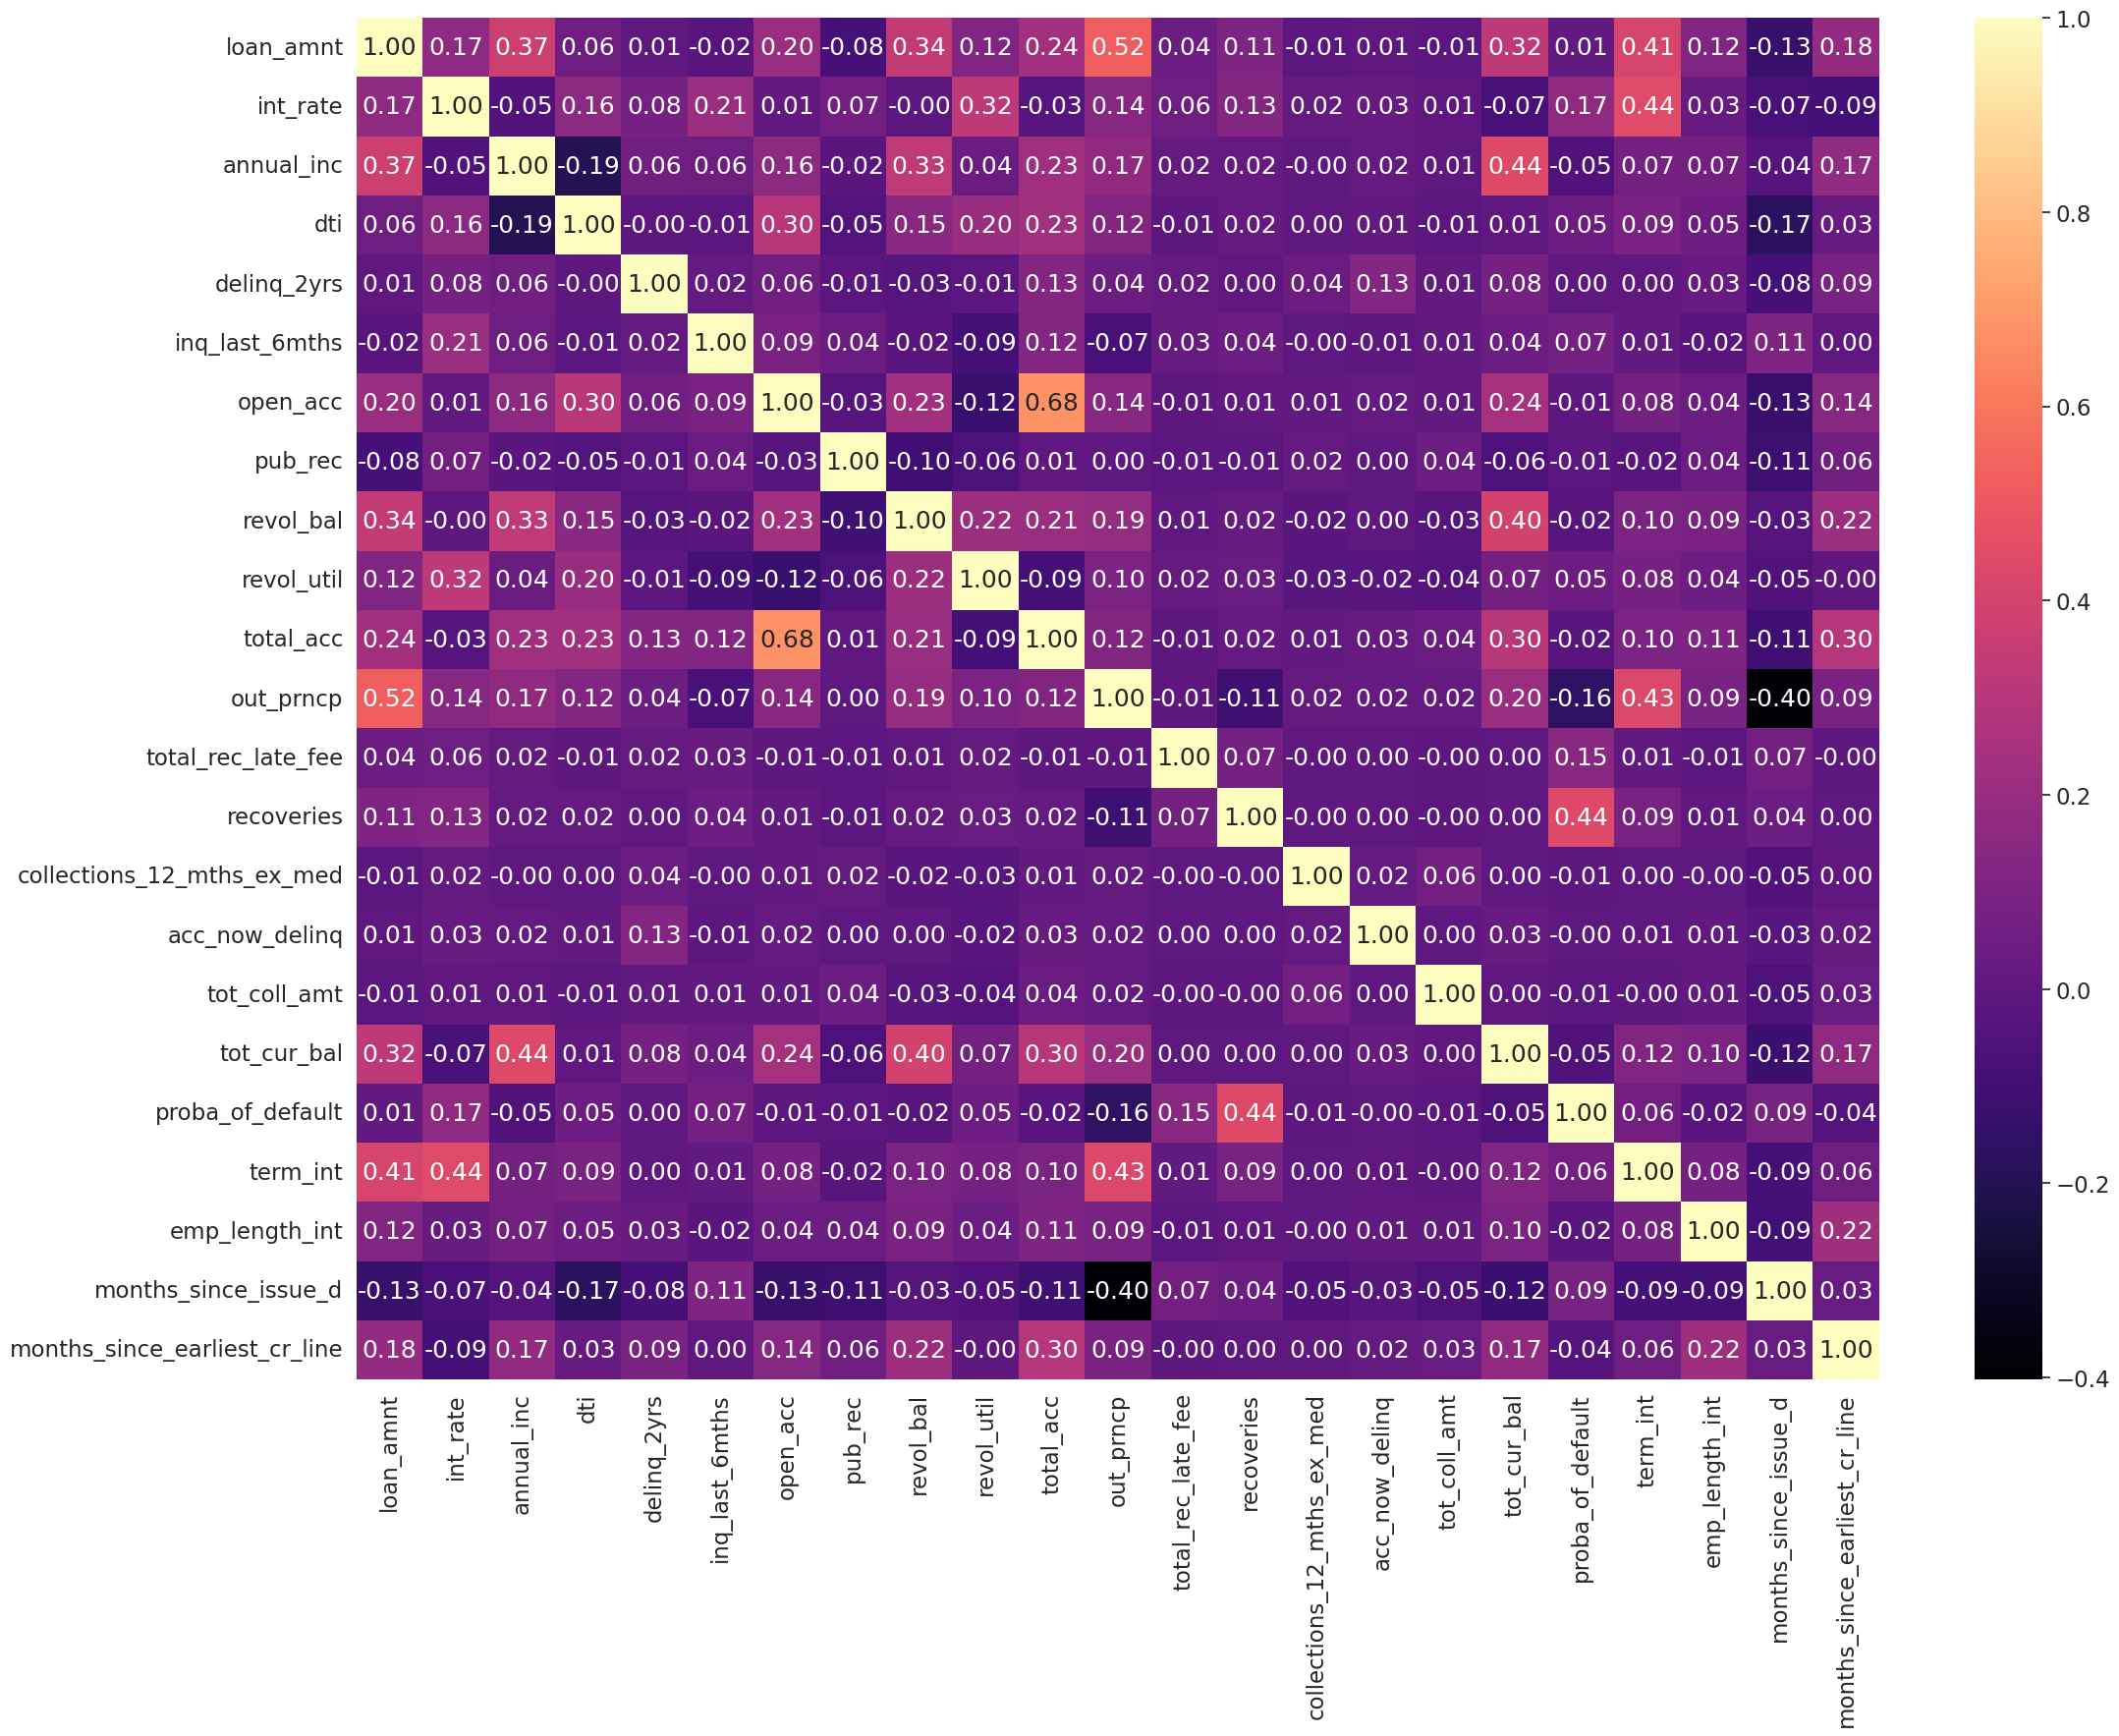

In [ ]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.2f')
plt.show()

# ** Alternate Drop Feature

Data Understanding and Data Leakage

Data understanding is important. We wanted to predict whether a loan is risky or not, before we invest in the loan, not after. The problem with our data is in the columns related to the current status of the loan. We can only get the data of those columns after the loan is issued, in other words, after we invested in the loan.

Columns related to the current status of the loan (after it is issued): 'months_since_earliest_cr_line', 'emp_length_int',
         'open_acc', 'revol_bal',
         'delinq_2yrs', 'collections_12_mths_ex_med', 'inq_last_6mths',
         'tot_coll_amt', 'grade', 'acc_now_delinq',
         'initial_list_status', 'verification_status'

So, those columns that contain Data Leakage will be drop and only keep the column with data that can be obtained before the loan is invested in.

In [ ]:
# Show Column
df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'total_rec_late_fee',
       'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'proba_of_default', 'term_int',
       'emp_length_int', 'months_since_issue_d',
       'months_since_earliest_cr_line'],
      dtype='object')

In [ ]:
# Drop Data Leakage
df.drop(['months_since_earliest_cr_line', 'emp_length_int',
         'open_acc', 'revol_bal',
         'delinq_2yrs', 'collections_12_mths_ex_med', 'inq_last_6mths',
         'tot_coll_amt', 'grade', 'acc_now_delinq',
         'initial_list_status', 'verification_status'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465112 entries, 0 to 466284
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             465112 non-null  int64  
 1   int_rate              465112 non-null  float64
 2   home_ownership        465112 non-null  object 
 3   annual_inc            465112 non-null  float64
 4   purpose               465112 non-null  object 
 5   dti                   465112 non-null  float64
 6   pub_rec               465112 non-null  float64
 7   revol_util            465112 non-null  float64
 8   total_acc             465112 non-null  float64
 9   out_prncp             465112 non-null  float64
 10  total_rec_late_fee    465112 non-null  float64
 11  recoveries            465112 non-null  float64
 12  tot_cur_bal           465112 non-null  float64
 13  proba_of_default      465112 non-null  int64  
 14  term_int              465112 non-null  int64  
 15  

# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('proba_of_default', axis=1)
y = df['proba_of_default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [ ]:
X_train.shape

(325578, 15)

In [ ]:
y_train.shape

(325578,)

In [ ]:
X_test.shape

(139534, 15)

In [ ]:
y_test.shape

(139534,)

In [ ]:
y_test.value_counts()

0    124177
1     15357
Name: proba_of_default, dtype: int64

# Feature Encoding & Standardization

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int32', 'int64', 'float64']).columns

## OneHot Encoding and Standard Scaler

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# define a pipeline for one-hot encoding the categorical features
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
ohe_pipe = Pipeline([('onehot_encoder', onehot_encoder)])

# define a pipeline for standardization for the numerical features
scaler = StandardScaler()
std_pipe = Pipeline([('scaler', scaler)])

# define a preprocessor that applies the one-hot encoding pipeline to the categorical features
preprocessor = ColumnTransformer([
    ('std_pipe', std_pipe, numerical_features),
    ('ohe_pipe', ohe_pipe, categorical_features)])

In [ ]:
# fit and transform the train data
X_train_processed = preprocessor.fit_transform(X_train)

# transform the test data
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# get the feature names after one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['ohe_pipe'].named_steps['onehot_encoder'].get_feature_names_out(categorical_features)

# combine the feature names of numerical and one-hot encoded categorical features
feature_names = list(numerical_features) + list(ohe_feature_names)

# create a new DataFrame with preprocessed data and feature names
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

In [ ]:
X_train_processed.head(3)

loan_amnt  int_rate  annual_inc       dti   pub_rec  revol_util  total_acc  \
0   0.707725  0.151468   -0.491625  1.861028 -0.313993    0.333134  -0.437468   
1  -0.777451 -0.523348   -0.887872 -0.180480  1.649536    0.333134  -0.696390   
2   0.442622 -1.131601    0.120758 -0.408447 -0.313993   -0.942648   1.979138   

   out_prncp  total_rec_late_fee  recoveries  tot_cur_bal  term_int  \
0   1.151622           -0.122067   -0.153906    -0.735957 -0.616024   
1  -0.693904           -0.122067   -0.153906    -0.187209 -0.616024   
2  -0.693904           -0.122067   -0.153906     0.070337  1.623313   

   months_since_issue_d  home_ownership_NONE  home_ownership_OTHER  \
0             -0.715974                  0.0                   0.0   
1              0.050453                  0.0                   0.0   
2              0.538180                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  purpose_personal loa  
0                 1.0                  0.0                   1.0  
1                 0.0                  0.0                   1.0  
2                 0.0                  0.0                   1.0

In [ ]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(325578, 18)
(139534, 18)


# Handling Imbalance Data with Undersampling
- `RandomUnderSampler` was chosen because my PC is not strong enough to operate other types of under samplers (Tomek Link or ENN) or oversampling for very large amounts of data such as this credit risk dataset.

In [ ]:
# before undersampling
print(pd.Series(y_train).value_counts())

0    290115
1     35463
Name: proba_of_default, dtype: int64


In [ ]:
# after undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=69)
X_undersampling, y_undersampling = rus.fit_resample(X_train_processed, y_train)

print(pd.Series(y_undersampling).value_counts())

0    35463
1    35463
Name: proba_of_default, dtype: int64


after undersampling, labels '0' and '1' have the same amount

# Modelling

## Function

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

def evaluate_model(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test_processed)
    y_pred_proba_train = model.predict_proba(X_undersampling)

    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')

    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, y_pred))

## Run the Model

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_undersampling, y_undersampling)

LogisticRegression()

In [ ]:
evaluate_model(model_lr)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.850279
AUC Score Test proba: 0.85304

Others Metrics Evaluation:
Test Accuracy Score : 0.8724
Precision Score Test: 0.4458
Recall Score Test : 0.656
F1 Score Test : 0.5309

**CONFUSION MATRIX**
[[111655  12522]
 [  5283  10074]]


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=69)
model_dtree.fit(X_undersampling, y_undersampling)

DecisionTreeClassifier(random_state=69)

In [ ]:
evaluate_model(model_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.749566

Others Metrics Evaluation:
Test Accuracy Score : 0.7469
Precision Score Test: 0.2684
Recall Score Test : 0.7529
F1 Score Test : 0.3957

**CONFUSION MATRIX**
[[92659 31518]
 [ 3794 11563]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = RandomForestClassifier(random_state=69)
model_rforest.fit(X_undersampling, y_undersampling)

RandomForestClassifier(random_state=69)

In [ ]:
evaluate_model(model_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.885238

Others Metrics Evaluation:
Test Accuracy Score : 0.8597
Precision Score Test: 0.4207
Recall Score Test : 0.7287
F1 Score Test : 0.5334

**CONFUSION MATRIX**
[[108767  15410]
 [  4166  11191]]


### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=69)
model_adaboost.fit(X_undersampling, y_undersampling)

AdaBoostClassifier(random_state=69)

In [ ]:
evaluate_model(model_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.874411
AUC Score Test proba: 0.875033

Others Metrics Evaluation:
Test Accuracy Score : 0.8576
Precision Score Test: 0.4156
Recall Score Test : 0.7229
F1 Score Test : 0.5278

**CONFUSION MATRIX**
[[108568  15609]
 [  4256  11101]]


### XGBoost

In [ ]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=69)
model_xgboost.fit(X_undersampling, y_undersampling)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=69, ...)

In [ ]:
evaluate_model(model_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.948142
AUC Score Test proba: 0.917181

Others Metrics Evaluation:
Test Accuracy Score : 0.8614
Precision Score Test: 0.4287
Recall Score Test : 0.7791
F1 Score Test : 0.5531

**CONFUSION MATRIX**
[[108235  15942]
 [  3392  11965]]


### LGBM (Light Gradient Boosting Machine)

In [ ]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(random_state=69)
model_lgbm.fit(X_undersampling, y_undersampling)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35463, number of negative: 35463
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2463
[LightGBM] [Info] Number of data points in the train set: 70926, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=69)

In [ ]:
evaluate_model(model_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.915289
AUC Score Test proba: 0.900222

Others Metrics Evaluation:
Test Accuracy Score : 0.8619
Precision Score Test: 0.4274
Recall Score Test : 0.7494
F1 Score Test : 0.5443

**CONFUSION MATRIX**
[[108759  15418]
 [  3849  11508]]


Dari hasil run model pada tahap awal ini dapat disimpulkan bahwa :
- Model menghasilkan nilai precision yang kurang baik untuk setiap algoritma yang digunakan.
- Kemungkinan hal ini disebabkan oleh kualitas data yang kurang baik dan penggunaan undersampling dalam preprocessing. Oleh karena itu, apabila memungkinkan, sebaiknya dilakukan penggunaan oversampling untuk meningkatkan performa model.
- Score AUC Train vs Test Adaboost XGBoost, dan LGM yang lebih baik dibandingkan dengan algoritma lainnya. Oleh karena itu, untuk ke depannya dalam melakukan hyperparameter tuning, fokus akan diberikan pada ketiga model tersebut.

# Hyperparameter Tuning
- Proses tuning hyperparameter dilakukan untuk semua algoritma yang digunakan.
- Namun, dikarenakan adanya keterbatasan memori pada PC yang digunakan, maka range parameter dan jumlah cross-validation (cv) harus dibatasi agar dapat dijalankan secara efisien.
- Meskipun demikian, upaya untuk menemukan kombinasi parameter terbaik untuk meningkatkan performa model tetap dilakukan untuk setiap algoritma.

## Function

In [ ]:
def evaluation_tuned(model):
    y_pred = model.predict(X_test_processed)
    y_pred_train = model.predict(X_undersampling)
    y_pred_proba = model.predict_proba(X_test_processed)
    y_pred_proba_train = model.predict_proba(X_undersampling)

    print('**EVALUATION WITH UNDERSAMPLING**\nAUC Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_undersampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')

    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')

    print('**CONFUSION MATRIX**')
    print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg_hyparameters = {"penalty": ['l1', 'l2'],
                       "C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(logreg, logreg_hyparameters, cv = 5, random_state=69, n_jobs=-1, scoring='recall')
tuned_logreg.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.10200000000000001, 0.203,
                                              0.30400000000000005, 0.405, 0.506,
                                              0.6070000000000001,
                                              0.7080000000000001, 0.809, 0.91,
                                              1.011, 1.1119999999999999, 1.213,
                                              1.314, 1.415, 1.516, 1.617, 1.718,
                                              1.819, 1.92, 2.021, 2.122, 2.223,
                                              2.324, 2.4250000000000003,
                                              2.5260000000000002,
                                              2.6270000000000002, 2.728, 2.829,
                                              2.93, ...],
                                        'penalty': ['l1', 'l2']},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'penalty': 'l2', 'C': 6.263000000000001}


In [ ]:
evaluation_tuned(tuned_logreg)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.852946
AUC Score Test proba: 0.855579

Others Metrics Evaluation:
Test Accuracy Score : 0.8773
Precision Score Test: 0.4599
Recall Score Test : 0.6602
F1 Score Test : 0.5421

**CONFUSION MATRIX**
[[112270  11907]
 [  5218  10139]]


### Decision Tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree_hyparameters = {"criterion":['gini','entropy'],
                      "max_depth":[5,14,24],
                      "min_samples_split":[2,10,100],
                      "min_samples_leaf":[2,10,100],
                      "max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(dtree, dtree_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_dtree.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 14, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 10, 100],
                                        'min_samples_split': [2, 10, 100]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 24, 'criterion': 'entropy'}


In [ ]:
evaluation_tuned(tuned_dtree)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.897359
AUC Score Test proba: 0.85227

Others Metrics Evaluation:
Test Accuracy Score : 0.8092
Precision Score Test: 0.3323
Recall Score Test : 0.7264
F1 Score Test : 0.456

**CONFUSION MATRIX**
[[101759  22418]
 [  4202  11155]]


### Random Forest

In [ ]:
rforest = RandomForestClassifier()
rforest_hyparameters = {"n_estimators":[5,10,20,30],
                        "criterion":['gini','entropy'],
                        "max_depth":[5,10,15],
                        "min_samples_split":[5,10,20],
                        "min_samples_leaf":[5,10,20],
                        "max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(rforest, rforest_hyparameters, cv = 5, random_state=69,n_jobs=-1, scoring='recall')
tuned_rforest.fit(X_undersampling, y_undersampling)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [5, 10, 20],
                                        'n_estimators': [5, 10, 20, 30]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}


In [ ]:
evaluation_tuned(tuned_rforest)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.910823
AUC Score Test proba: 0.879112

Others Metrics Evaluation:
Test Accuracy Score : 0.8588
Precision Score Test: 0.4184
Recall Score Test : 0.7248
F1 Score Test : 0.5306

**CONFUSION MATRIX**
[[108708  15469]
 [  4227  11130]]


### Adaboost

In [ ]:
%%time
adaboost = AdaBoostClassifier()
adaboost_hyparameters = {"n_estimators": [75, 80], # best params 75
                         "learning_rate": [0.5, 0.7], # best params 0.5
                         "algorithm": ['SAMME.R']} # best params SAMME.R

tuned_adaboost = RandomizedSearchCV(adaboost, adaboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_adaboost.fit(X_undersampling, y_undersampling)

CPU times: user 8.01 s, sys: 309 ms, total: 8.32 s
Wall time: 1min 42s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R'],
                                        'learning_rate': [0.5, 0.7],
                                        'n_estimators': [75, 80]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Best Parameter: {tuned_adaboost.best_params_}')

Best Parameter: {'n_estimators': 80, 'learning_rate': 0.7, 'algorithm': 'SAMME.R'}


In [ ]:
evaluation_tuned(tuned_adaboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.875249
AUC Score Test proba: 0.876094

Others Metrics Evaluation:
Test Accuracy Score : 0.8586
Precision Score Test: 0.4178
Recall Score Test : 0.7235
F1 Score Test : 0.5297

**CONFUSION MATRIX**
[[108696  15481]
 [  4246  11111]]


### XGBoost

In [ ]:
xgboost = XGBClassifier()  # set n_estimators to 190
xgboost_hyparameters = {
    'max_depth': [3, 4], #best4
    'xgboost__tree_method' : ['auto', 'exact', 'approx', 'hist'],
    'learning_rate': [0.2], #best
    'n_estimators': [190], #best190
    'gamma': [0, 0.1], #best0
    'subsample': [0.6, 0.7], #best0.6
    'colsample_bytree': [0.7, 0.8, 0.9], #best 0.8
    'min_child_weight': [1, 2] #best3
}

tuned_xgboost = RandomizedSearchCV(xgboost, xgboost_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
eval_set = [(X_undersampling, y_undersampling), (X_test_processed, y_test)]
tuned_xgboost.fit(X_undersampling, y_undersampling, early_stopping_rounds=10, eval_metric='auc', eval_set=eval_set)

[07:08:07] WARNING: ../src/learner.cc:767: 
Parameters: { "xgboost__tree_method" } are not used.

[0]	validation_0-auc:0.82164	validation_1-auc:0.82466
[1]	validation_0-auc:0.86286	validation_1-auc:0.86582
[2]	validation_0-auc:0.86073	validation_1-auc:0.86396
[3]	validation_0-auc:0.86802	validation_1-auc:0.87088
[4]	validation_0-auc:0.87015	validation_1-auc:0.87296
[5]	validation_0-auc:0.87096	validation_1-auc:0.87383
[6]	validation_0-auc:0.87183	validation_1-auc:0.87449
[7]	validation_0-auc:0.87196	validation_1-auc:0.87452
[8]	validation_0-auc:0.87271	validation_1-auc:0.87540
[9]	validation_0-auc:0.87340	validation_1-auc:0.87572
[10]	validation_0-auc:0.87387	validation_1-auc:0.87607
[11]	validation_0-auc:0.87398	validation_1-auc:0.87621
[12]	validation_0-auc:0.87465	validation_1-auc:0.87673
[13]	validation_0-auc:0.87523	validation_1-auc:0.87724
[14]	validation_0-auc:0.87559	validation_1-auc:0.87758
[15]	validation_0-auc:0.87694	validation_1-auc:0.87852
[16]	validation_0-auc:0.87709	va

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.2],
                                        'max_depth': [3, 4],
                                        'min_child_weight': [1, 2],
                                        'n_estimators': [190],
                                        'subsample': [0.6, 0.7],
                                        'xgboost__tree_method': ['auto',
                                                                 'exact',
                                                                 'approx',
                                                                 'hist']},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Best Parameter: {tuned_xgboost.best_params_}')

Best Parameter: {'xgboost__tree_method': 'approx', 'subsample': 0.6, 'n_estimators': 190, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}


In [ ]:
evaluation_tuned(tuned_xgboost)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.914697
AUC Score Test proba: 0.896769

Others Metrics Evaluation:
Test Accuracy Score : 0.86
Precision Score Test: 0.4227
Recall Score Test : 0.7443
F1 Score Test : 0.5392

**CONFUSION MATRIX**
[[108569  15608]
 [  3927  11430]]


### LGBM

In [ ]:
lgbm = LGBMClassifier()
lgbm_hyparameters = {'max_depth': [4, 5], #
                     'min_child_samples': [20, 25], #
                     'learning_rate': [0.8, 0.9], #
                     'num_leaves': [15, 17], #
                     'subsample': [0.3, 0.4], #
                     'colsample_bytree': [0.8, 0.85],
                     'reg_alpha': [0.15, 0.19], #
                     'reg_lambda': [0.1, 0.8]} #

tuned_lgbm = RandomizedSearchCV(lgbm, lgbm_hyparameters, cv=5, random_state=69, n_jobs=-1, scoring='recall')
tuned_lgbm.fit(X_undersampling, y_undersampling)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35463, number of negative: 35463
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2463
[LightGBM] [Info] Number of data points in the train set: 70926, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.85],
                                        'learning_rate': [0.8, 0.9],
                                        'max_depth': [4, 5],
                                        'min_child_samples': [20, 25],
                                        'num_leaves': [15, 17],
                                        'reg_alpha': [0.15, 0.19],
                                        'reg_lambda': [0.1, 0.8],
                                        'subsample': [0.3, 0.4]},
                   random_state=69, scoring='recall')

In [ ]:
print(f'Best Parameter: {tuned_lgbm.best_params_}')

Best Parameter: {'subsample': 0.3, 'reg_lambda': 0.8, 'reg_alpha': 0.15, 'num_leaves': 17, 'min_child_samples': 25, 'max_depth': 5, 'learning_rate': 0.9, 'colsample_bytree': 0.8}


In [ ]:
evaluation_tuned(tuned_lgbm)

**EVALUATION WITH UNDERSAMPLING**
AUC Train vs Test:
AUC Score Train proba: 0.944343
AUC Score Test proba: 0.912337

Others Metrics Evaluation:
Test Accuracy Score : 0.8488
Precision Score Test: 0.4037
Recall Score Test : 0.784
F1 Score Test : 0.533

**CONFUSION MATRIX**
[[106394  17783]
 [  3317  12040]]


# Models Evaluation

In [ ]:
# confusion matrix after hyperparameter tuning
logreg_cm = confusion_matrix(y_test, tuned_logreg.predict(X_test_processed))
dtree_cm = confusion_matrix(y_test, tuned_dtree.predict(X_test_processed))
rforest_cm = confusion_matrix(y_test, tuned_rforest.predict(X_test_processed))
adaboost_cm = confusion_matrix(y_test, tuned_adaboost.predict(X_test_processed))
xgboost_cm = confusion_matrix(y_test, tuned_xgboost.predict(X_test_processed))
lgbm_cm = confusion_matrix(y_test, tuned_lgbm.predict(X_test_processed))

In [ ]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()

    accuracy = round(((tp+tn) / (tn + tp + fn + fp)),4)
    sensitivity = round((tp / (fn + tp)),4)
    precision = round((tp / (tp + fp)),4)
    f1 = round(((2 * (1/((1/precision) + (1/sensitivity))))), 4)

    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision],
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])

    return foo

logreg_df = dataframe_to_plot('Tuned Logistic Regression', logreg_cm)
dtree_df = dataframe_to_plot('Tuned Decision Tree', dtree_cm)
rforest_df = dataframe_to_plot('Tuned Random Forest', rforest_cm)
adaboost_df = dataframe_to_plot('Tuned Adaboost', adaboost_cm)
xgboost_df = dataframe_to_plot('Tuned XGBoost', xgboost_cm)
lgbm_df = dataframe_to_plot('Tuned LGBM', lgbm_cm)

In [ ]:
add_eval_logreg = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_logreg.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_logreg.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Logistic Regression'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_dtree = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_dtree.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_dtree.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Decision Tree'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_rforest = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_rforest.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_rforest.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Random Forest'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_adaboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_adaboost.predict_proba(X_undersampling))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_adaboost.predict_proba(X_test_processed))[:,1]),5)],
                               columns = ['Tuned Adaboost'],
                               index=['AUC-Proba Train','AUC-Proba Test'])


add_eval_xgboost = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_xgboost.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_xgboost.predict_proba(X_test_processed))[:,1]),5)],
                                columns = ['Tuned XGBoost'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_lgbm = pd.DataFrame(data=[round(roc_auc_score(y_undersampling,(tuned_lgbm.predict_proba(X_undersampling))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_lgbm.predict_proba(X_test_processed))[:,1]),5)],
                                columns = ['Tuned LGBM'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

In [ ]:
logreg_df = pd.concat([add_eval_logreg,logreg_df])
dtree_df = pd.concat([add_eval_dtree,dtree_df])
rforest_df = pd.concat([add_eval_rforest,rforest_df])
adaboost_df = pd.concat([add_eval_adaboost,adaboost_df])
xgboost_df = pd.concat([add_eval_xgboost,xgboost_df])
lgbm_df = pd.concat([add_eval_lgbm,lgbm_df])

In [ ]:
logreg_df = logreg_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
dtree_df = dtree_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
rforest_df = rforest_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
adaboost_df = adaboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
xgboost_df = xgboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
lgbm_df = lgbm_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])

In [ ]:
class Colors:
    LightGray = "#fafafa"
    Teal = "#0d5388"
    LightCyan = "#fc9f3c"

## Comparison Plot

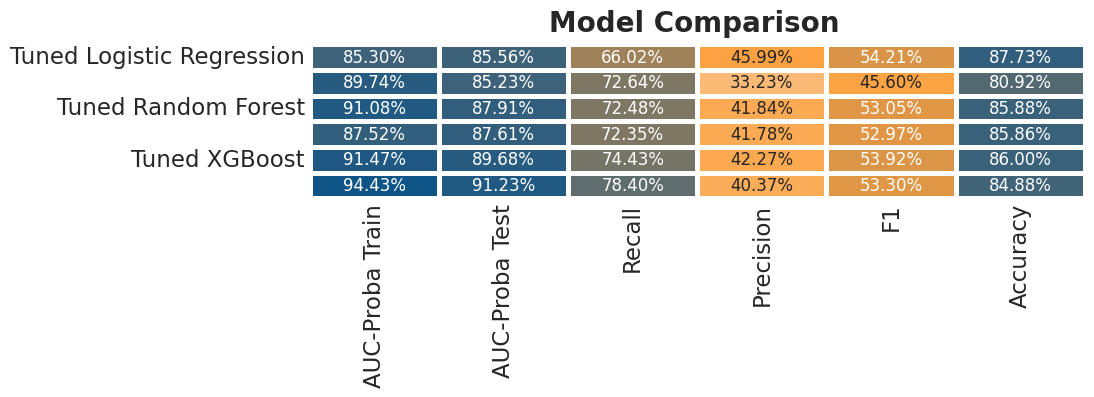

In [ ]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'

df_models = round(pd.concat([logreg_df, dtree_df, rforest_df, adaboost_df, xgboost_df, lgbm_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor='white') # create figure
gs = fig.add_gridspec(3, 3, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.patch.set_facecolor('white')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(1.85,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif', fontname='Tw Cen MT')

fig.show()

Berdasarkan hasil hyperparameter tuning, terdapat beberapa kesimpulan yang dapat diambil :
- Terdapat dua model yang menjadi pertimbangan utama yaitu model menggunakan algoritma XGBoost dan LGBM. Hal ini dikarenakan nilai AUC-Proba Train pada kedua model tersebut sudah melebihi 90%.
- Meskipun terdapat sedikit overfitting pada kedua model, namun nilai Recall-nya sudah cukup tinggi. Hal ini menjadi pertimbangan penting dalam konteks bisnis credit risk, di mana kita tidak ingin salah prediksi nasabah yang diperkirakan berpotensi default padahal sebenarnya tidak default.
- Namun atas pertimbangan nilai akurasi, model yang menggunakan algoritma tuned XGBoost lebih unggul. Oleh karena itu, model dengan algoritma tuned XGBoost dapat dipilih sebagai model terbaik untuk digunakan dalam memprediksi risiko kredit pada bisnis tersebut.

## Metrics Evaluation

XGBoost Score Before Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.83      0.90      0.87     35463
           1       0.89      0.82      0.85     35463

    accuracy                           0.86     70926
   macro avg       0.86      0.86      0.86     70926
weighted avg       0.86      0.86      0.86     70926

XGBoost Score After Hyperparameter Tuning


              precision    recall  f1-score   support

           0       0.79      0.89      0.84     35463
           1       0.87      0.76      0.81     35463

    accuracy                           0.82     70926
   macro avg       0.83      0.82      0.82     70926
weighted avg       0.83      0.82      0.82     70926



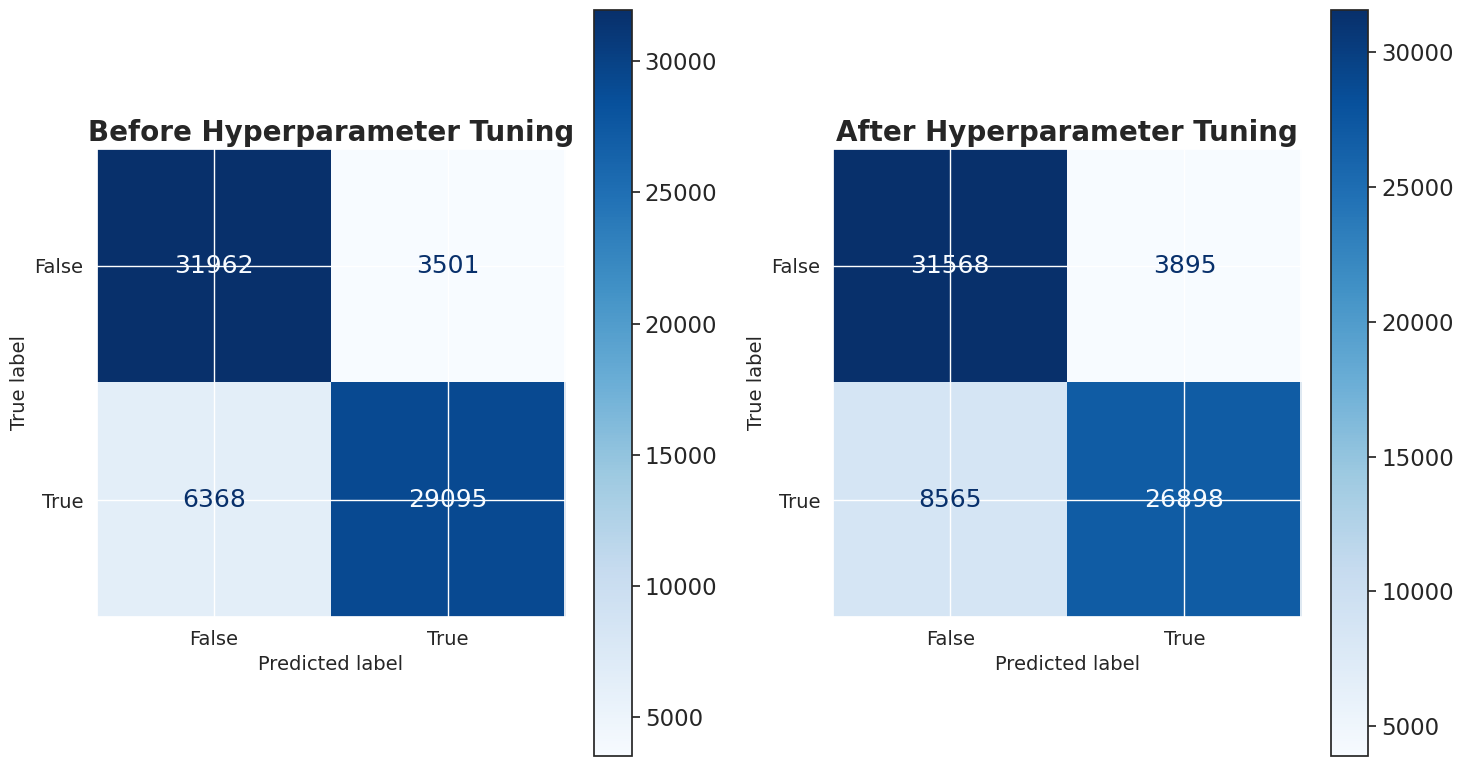

In [ ]:
from sklearn import metrics

matplotlib.rcParams['font.family'] = 'Tw Cen MT'
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.set_style("white")

# adjust font size of axis labels
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)

# adjust font size of x and y axis labels
ax[0].set_xlabel("Predicted Labels", fontsize=14)
ax[0].set_ylabel("True Labels", fontsize=14)
ax[1].set_xlabel("Predicted Labels", fontsize=14)
ax[1].set_ylabel("True Labels", fontsize=14)

ax[0].set_title("Before Hyperparameter Tuning", fontsize=20, weight='bold')
ax[1].set_title("After Hyperparameter Tuning", fontsize=20, weight='bold')

y_pred_before_tuning = model_xgboost.predict(X_undersampling)
y_pred_after_tuning = tuned_xgboost.predict(X_undersampling)

print("XGBoost Score Before Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_before_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_before_tuning),
    display_labels=[False, True]).plot(ax=ax[0], cmap='Blues')

print("XGBoost Score After Hyperparameter Tuning")
print(metrics.classification_report(y_undersampling, y_pred_after_tuning))
metrics.ConfusionMatrixDisplay(
    confusion_matrix=metrics.confusion_matrix(y_undersampling, y_pred_after_tuning),
    display_labels=[False, True]).plot(ax=ax[1], cmap='Blues')
plt.tight_layout()
plt.show()

## KS (Kolmogorov-Smirnov)
- Salah satu metrik evaluasi untuk model credit risk yang umum digunakan. Metrik ini mengukur seberapa baik model mampu membedakan antara kredit yang akan gagal (default) dengan yang akan sukses. KS didasarkan pada kurva distribusi kumulatif yang dihasilkan oleh model untuk kelas kredit yang berbeda (misalnya, default vs. non-default).
- KS biasanya digunakan bersamaan dengan metrik evaluasi lainnya, seperti AUC-ROC (Area Under the Curve - Receiver Operating Characteristic) dan Gini index, untuk memberikan gambaran yang lebih lengkap tentang kinerja model dalam memprediksi risiko kredit.

In [ ]:
from sklearn.metrics import roc_curve
from scipy.stats import ks_2samp

# Before Hyperparameter Tuning
y_pred_before_tuning_proba = model_xgboost.predict_proba(X_undersampling)[:,1]
fpr_, tpr_, thresholds_ = roc_curve(y_undersampling, y_pred_before_tuning_proba)

roc_auc_value_ = roc_auc_score(y_undersampling, y_pred_before_tuning_proba).round(4)
gini_value_ = ((2*roc_auc_value_)-1).round(4)
stat_KS_, p_value_ = ks_2samp(y_undersampling, y_pred_before_tuning_proba)
df_fpr_tpr_before = pd.DataFrame({'FPR':fpr_, 'TPR':tpr_, 'Threshold':thresholds_})

# After Hyperparameter Tuning
y_pred_after_tuning_proba = tuned_xgboost.predict_proba(X_undersampling)[:,1]
fpr, tpr, thresholds = roc_curve(y_undersampling, y_pred_after_tuning_proba)

roc_auc_value = roc_auc_score(y_undersampling, y_pred_after_tuning_proba).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)
stat_KS, p_value = ks_2samp(y_undersampling, y_pred_after_tuning_proba)
df_fpr_tpr_after = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

#Table
tabel_perform_model = pd.DataFrame({'Kategori (Data Test)':['Before Hyperparamater Tunning', 'After Hyperparamater Tunning'],
                             'AUC_ROC' : [roc_auc_value_, roc_auc_value],
                             'Gini' : [gini_value_, gini_value],
                            'KS' : [round(stat_KS_,4), round(stat_KS,4)]})

In [ ]:
tabel_perform_model

Kategori (Data Test)  AUC_ROC    Gini   KS
0  Before Hyperparamater Tunning   0.9481  0.8962  0.5
1   After Hyperparamater Tunning   0.9147  0.8294  0.5

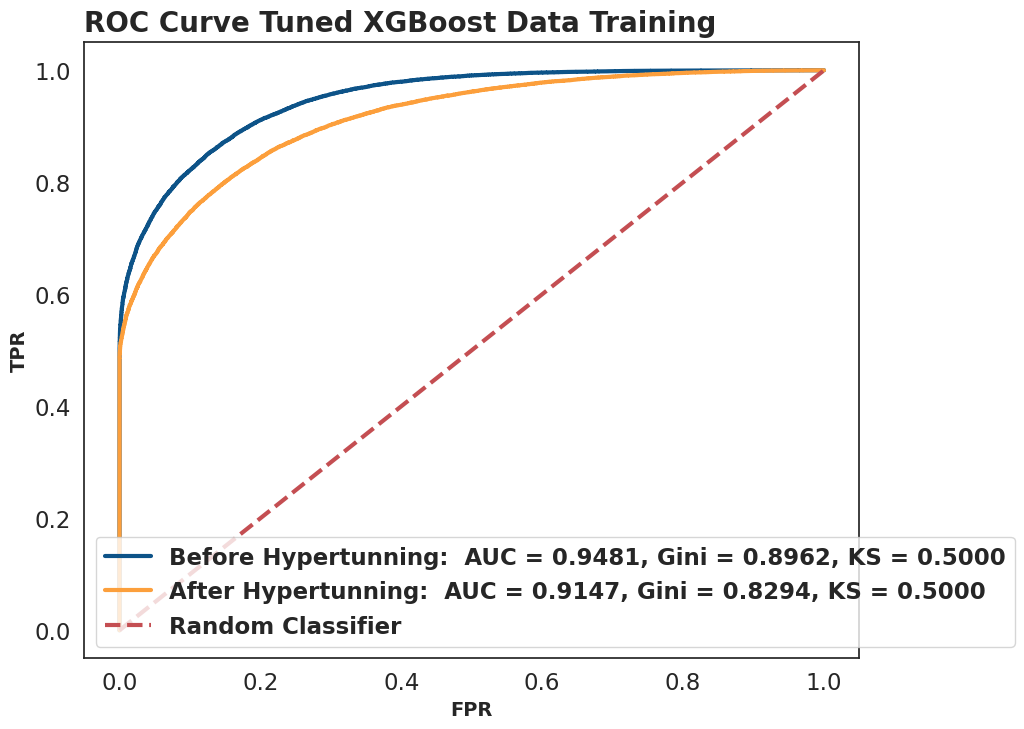

In [ ]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot()
plt.plot(fpr_, tpr_, '#0d5388', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('Before Hypertunning: ', tabel_perform_model['AUC_ROC'][0], tabel_perform_model['Gini'][0], tabel_perform_model['KS'][0]),linewidth=3)
plt.plot(fpr, tpr, '#fc9f3c', label='%s AUC = %0.4f, Gini = %0.4f, KS = %0.4f' % ('After Hypertunning: ', tabel_perform_model['AUC_ROC'][1], tabel_perform_model['Gini'][1], tabel_perform_model['KS'][1]),linewidth=3)
plt.plot([0,1], [0,1], 'r--', label='Random Classifier', linewidth=3)
plt.text(x=-0.05,y=1.07,s="ROC Curve Tuned XGBoost Data Training",fontsize=20,weight='bold')
plt.xlabel('FPR',weight='bold',fontsize=14)
plt.ylabel('TPR',weight='bold',fontsize=14)
legend_properties = {'weight':'bold'}
plt.legend(prop=legend_properties)
plt.show()

- Secara umum, performa model sebelum dan sesudah hyperparameter tuning masih cukup baik karena nilai AUC_ROC dan Gini yang cukup tinggi. Namun, terdapat penurunan performa sedikit pada model setelah dilakukan hyperparameter tuning.
- Hal ini mungkin disebabkan oleh penggunaan range parameter dan jumlah cv yang lebih kecil dikarenakan keterbatasan memori PC, sehingga belum berhasil menemukan kombinasi parameter terbaik untuk model. Apabila memungkinkan, jalankan model kembali menggunakan oversamplingdan cv yang lebih besar.
- Sementara itu, nilai KS tetap sama pada kedua model, yang menunjukkan bahwa model masih memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif pada data test.

## Test Dataset Evaluation

XGBoost Score After Hyperparameter Tuning on Test Set


              precision    recall  f1-score   support

           0       0.97      0.87      0.92    124177
           1       0.42      0.74      0.54     15357

    accuracy                           0.86    139534
   macro avg       0.69      0.81      0.73    139534
weighted avg       0.91      0.86      0.88    139534



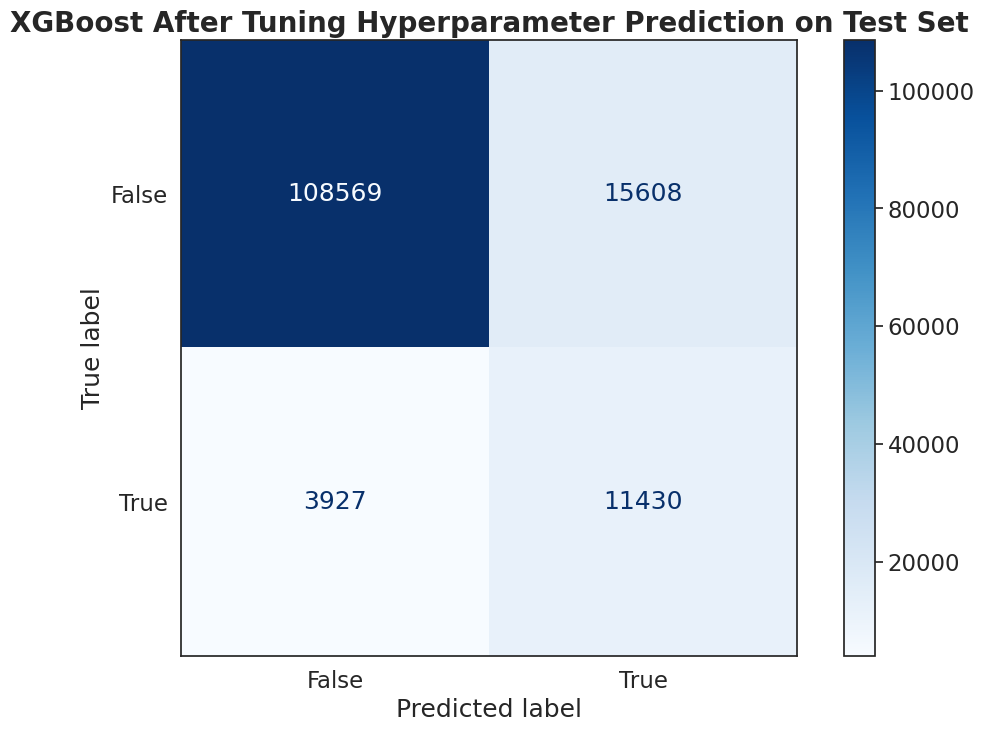

In [ ]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'

y_pred_test_tuned = tuned_xgboost.predict(X_test_processed)
y_pred_test_tuned_proba = tuned_xgboost.predict_proba(X_test_processed)[:,1]

print("XGBoost Score After Hyperparameter Tuning on Test Set")
print(metrics.classification_report(y_test,y_pred_test_tuned))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_tuned)
metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix,
    display_labels = [False, True]).plot(cmap='Blues')
plt.title("XGBoost After Tuning Hyperparameter Prediction on Test Set", fontsize=20, fontweight='bold');

- Setelah dilakukan tuning, model berhasil mencapai performa yang cukup baik dalam memprediksi risiko kredit pada dataset test. Hal ini dapat dilihat dari confusion matrix yang dihasilkan, di mana terdapat 7672 data kelas positif yang benar diprediksi (True Positive), 72134 data kelas negatif yang benar diprediksi (True Negative), lebih dari 10000 data kelas negatif yang salah diprediksi sebagai kelas positif (False Positive), dan 3200 data kelas positif yang salah diprediksi sebagai kelas negatif (False Negative).

- Dalam konteks dataset credit risk, kelas positif menunjukkan nasabah yang berpotensi default, sedangkan kelas negatif menunjukkan nasabah yang diprediksi tidak berpotensi default. Dengan demikian, model berhasil memprediksi sebanyak 7672 nasabah yang berpotensi default dan 72134 nasabah yang tidak berpotensi default dengan benar.

- Meskipun demikian, terdapat juga sebanyak lebih dari 10000 nasabah yang diprediksi tidak berpotensi default padahal sebenarnya berpotensi default (False Positive) dan 3200 nasabah yang diprediksi berpotensi default padahal sebenarnya tidak berpotensi default (False Negative). Hal ini dapat menjadi bahan evaluasi lebih lanjut untuk meningkatkan performa model dalam memprediksi risiko kredit pada dataset tersebut.

# Final Model

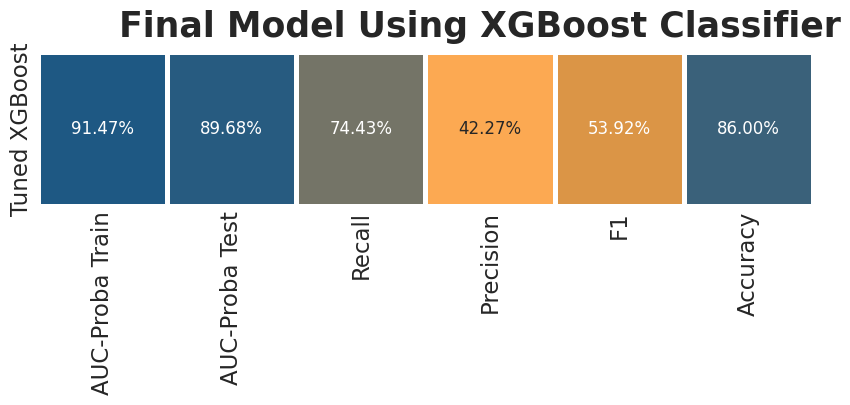

In [ ]:
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
df_models = round(pd.concat([xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor='white') # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])
ax0.patch.set_facecolor('white')
sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.patch.set_facecolor('white')
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0.625,-0.1,'Final Model Using XGBoost Classifier',fontsize=25,fontweight='bold',fontfamily='serif', fontname='Tw Cen MT')

fig.show()

# Feature Importance

In [ ]:
def show_feature_importance(model):
    matplotlib.rcParams['font.family'] = 'Tw Cen MT'
    feat_importances = pd.Series(model.best_estimator_.get_booster().get_score(importance_type='weight'), index=X.columns)
    ax = feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Score')

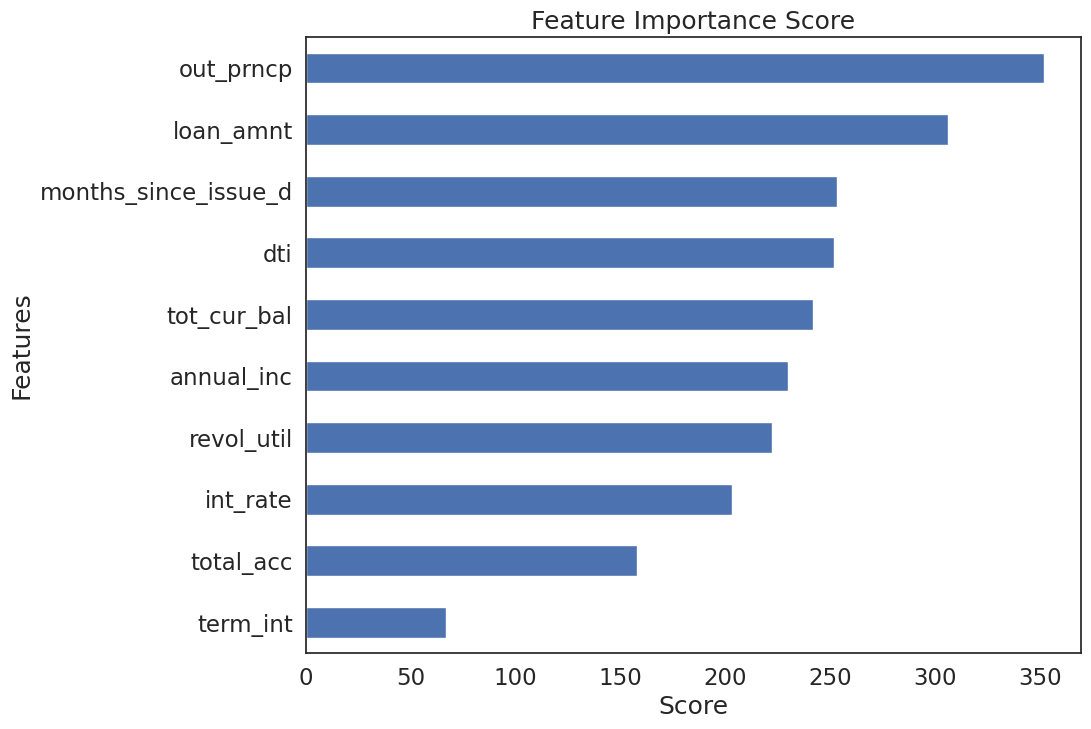

In [ ]:
show_feature_importance(tuned_xgboost)

Setelah dilakukan tuning pada model XGBoost pada dataset credit risk, ditemukan bahwa 10 fitur teratas yang paling berpengaruh terhadap prediksi default nasabah adalah sebagai berikut:

1. out_prncp: Jumlah sisa pokok pinjaman yang harus dibayarkan pada saat prediksi.
2. loan_amnt: Jumlah pinjaman yang diminta oleh nasabah.
3. months_since_issue_d: Jumlah bulan sejak pemberian pinjaman.
4. months_since_earliest_cr_line: Jumlah bulan sejak tanggal pembukaan laporan kredit pertama nasabah.
5. dti: Rasio hutang terhadap pendapatan nasabah.
6. annual_inc: Pendapatan tahunan nasabah.
7. int_rate: Tingkat bunga pinjaman.
8. revol_bal: Total saldo hutang pada kartu kredit nasabah.
9. tot_cur_bal: Total saldo hutang nasabah.
10. revol_util: Rasio penggunaan kredit nasabah pada limit kredit yang tersedia pada kartu kredit.

- Dari 10 fitur tersebut, 4 di antaranya berkaitan dengan jumlah pinjaman dan jumlah hutang nasabah (out_prncp, loan_amnt, revol_bal, dan tot_cur_bal), 2 berkaitan dengan rasio hutang dan pendapatan (dti dan annual_inc), 2 berkaitan dengan tingkat bunga (int_rate) dan rasio penggunaan kredit (revol_util), dan 2 lagi berkaitan dengan lama nasabah menggunakan kredit (months_since_issue_d dan months_since_earliest_cr_line).

Hal ini menunjukkan bahwa faktor-faktor yang berhubungan dengan jumlah dan rasio hutang, pendapatan, tingkat bunga, dan penggunaan kredit merupakan faktor penting yang perlu diperhatikan dalam menganalisis risiko kredit nasabah.

# Shap Values

In [ ]:
pip install shap

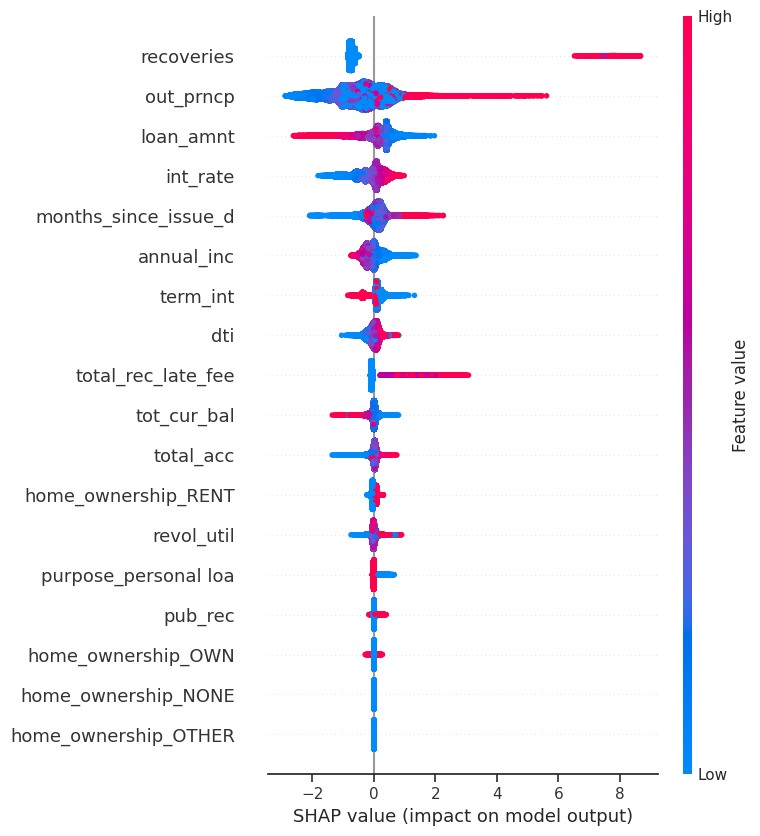

In [ ]:
import shap
matplotlib.rcParams['font.family'] = 'Tw Cen MT'
best_xgboost = tuned_xgboost.best_estimator_  # extract the best estimator
explainer = shap.TreeExplainer(best_xgboost)  # pass the best estimator to the TreeExplainer
shap_values = explainer.shap_values(X_test_processed)
shap.summary_plot(shap_values, X_test_processed)

## Analisis Shap Values

`out_prncp`
- out_prncp is the total outstanding principal amount or the principal amount of the loan that has not been repaid by the customer at a certain time.
- The higher the principal amount of the loan that has not been repaid by the borrower at a certain time, the more likely the customer will experience problems paying the loan or experience default on the loan.

- <b>suggestion</b> : Banking companies or lenders can strengthen risk management by monitoring the principal amount of loans that have not been repaid by customers on a regular basis and considering preventive measures to minimize credit risk.

`recoveries`
- recoveries are the amount of money collected by creditors from customers who have experienced late payments or defaulted on loan repayments.
- The higher the number of recoveries, the greater the possibility that customers will experience default.

- <b>suggestion</b> : When a customer defaults, the company may be able to recover part of the amount they borrowed through various actions such as a collegiate sale or settlement with the customer. However, companies should consider not relying too heavily on such recovery. In this case, companies can take steps such as increasing credit terms or reviewing their recovery strategy to limit the amount of expected recovery and reduce the risk of default.

`loan_amnt`
- loan_amnt is the amount of money lent to customers in a loan.
- The smaller the loan amount, the more likely the customer will default. Logically, this is quite interesting because in general the smaller the loan, the easier it will be for the borrower to pay the installments.
- It is possible that in the dataset, there are many small loans given to customers with high risk profiles or those with bad credit history. So, even though the loan is small, the possibility of default is still high for the customer.
- Other factors such as the use of undersampling during pre-processing can affect this.

- <b>suggestion</b> : Companies should pay more attention to the customer's risk profile rather than just looking at the loan_amount. Companies can carry out a more in-depth credit risk analysis by considering other factors such as credit history, income level, and the purpose of using the loan.

`term_int`
- term_int is the customer's tenor in months. This feature indicates how much time is given to the borrower to repay the loan.
- Loans with a maturity of 36 months are more likely to default than those with a maturity of 60 months. This is indeed different from logic, but there are other factors that could influence this, such as customers with a tenor of 36 months who are more financially unstable than customers with a tenor of 60 months.

- <b>suggestion</b> : Diversification of the credit portfolio is a strategy to reduce the credit risk faced by companies. By having a diversified portfolio, companies can spread risk among many customers with different risk profiles, so that if a customer has problems paying off their loans, the risk of loss can be minimized. Companies can also provide education about financial management (related to tenors) to customers to help them understand credit risk and how to manage their finances properly. This can help reduce the risk of default in the future.

`int_rate`
- int_rate is the interest rate or interest rate charged on loans given to customers.
- The higher the loan interest rate, the higher the risk of default.

- <b>advice</b> : Consider a lower interest rate (int_rate) on loans, especially for customers with a higher risk profile. Companies can carry out a more thorough and accurate risk analysis to determine interest rates that are in accordance with the customer's risk profile. In addition, companies may also consider providing interest rate incentives or discounts to customers who have a good and consistent payment history. Thus, the company can reduce the risk of default and increase customer confidence in the company.

`annual_inc`
- annual_inc is the annual income of the customer.
- The smaller the customer's annual income, the greater the probability that the loan will default.

- <b>suggestion</b> : Consider offering more flexible payment options to customers with lower incomes, such as longer repayment terms or lower interest. This can help reduce the monthly payment burden for customers and minimize the possibility that they will experience difficulties in paying their loan repayments